# Avito Deal Prediction Project

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.stats import itemfreq
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import feature
from PIL import Image as IMG
import operator
import cv2
import os 

from IPython.core.display import HTML 
from IPython.display import Image

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
pd.set_option('display.max_colwidth', -1)

## Part 1 Data Preparation

## Image Feature Enigneering

**The dataset provide us with image data and image is indeed an vital component of the whether a product can be sold or a deal to be made.
So, we need to futher look into the images and extract features of them. 
Here we extracted important features as size, brightness, color and blurness.**

### **1.Load image file**

#### Train image

In [22]:
images_path = 'data_train/competition_files/train_jpg/'
imgs = os.listdir(images_path)

trainfeatures = pd.DataFrame()
trainfeatures['image'] = imgs

In [23]:
trainfeatures.shape

(1390836, 1)

In [24]:
trainfeatures.head()

,image
0,8dcbb19ea48c147459e794b03aa09b3318431b96fb6041502d2f3ab7b1d0df60.jpg
1,b85f7e2088321d34aff002e5dd6cde4dce5b186a2f048feff606141e4b0ab500.jpg
2,955fbbab8945d281019afa1bb2e023eed918b40b9e2ff7278917475e65a3afbb.jpg
3,909088a416226f13e545ae3b22461526329e783c1087c01932462c9f47844e51.jpg
4,845defffcb3876df3c272bbe807e21d6b028a67dafb68a4ef3e81b81a89164b9.jpg


In [25]:
trainfeatures['image']=trainfeatures.loc[trainfeatures['image']!= '4f029e2a00e892aa2cac27d98b52ef8b13d91471f613c8d3c38e3f29d4da0b0c.jpg']
trainfeatures['image']=trainfeatures.loc[trainfeatures['image']!= '8513a91e55670c709069b5f85e12a59095b802877715903abef16b7a6f306e58.jpg']
trainfeatures['image']=trainfeatures.loc[trainfeatures['image']!= 'b98b291bd04c3d92165ca515e00468fd9756af9a8f1df42505deed1dcfb5d7ae.jpg']
trainfeatures['image']=trainfeatures.loc[trainfeatures['image']!= '60d310a42e87cdf799afcd89dc1b11ae3fdc3d0233747ec7ef78d82c87002e83.jpg']

In [26]:
trainfeatures=trainfeatures.dropna()

#### Test Image

In [4]:
images_path = 'data_test/competition_files/test_jpg/'
imgs = os.listdir(images_path)
testfeatures = pd.DataFrame()
testfeatures['image'] = imgs

In [5]:
testfeatures.shape

(465829, 1)

In [6]:
testfeatures.head()

,image
0,92a6b39418c923f0f355ceaf1730e68830642adad1717d63ceb55763df6db226.jpg
1,4515db3febc5a5b5bb67f6e001852d51490a034b06b32bdda531e57b7324c3eb.jpg
2,e24895e7cb6907f11666030cc9832522fa9f109c4b963efc999799ea85e61876.jpg
3,a7bcff0577a27ae18cda798d73ff396add9dc17ae2cf80e44cbff72ad265393c.jpg
4,c858d8cebbaeff9e069c5b22ea62877516e6a5ff44d4e5d0a5ee4a5dcc633fd6.jpg


In [7]:
testfeatures['image']=testfeatures.loc[testfeatures['image']!= '4f029e2a00e892aa2cac27d98b52ef8b13d91471f613c8d3c38e3f29d4da0b0c.jpg']
testfeatures['image']=testfeatures.loc[testfeatures['image']!= '8513a91e55670c709069b5f85e12a59095b802877715903abef16b7a6f306e58.jpg']

In [8]:
testfeatures=testfeatures.dropna()

### **2.Extract Useful Variables**

### **a.Image Size**

In [27]:
def size(filename):
    filename = images_path + filename
    st = os.stat(filename)
    return st.st_size

In [28]:
def pixel(img):
    path = str(images_path) + str(img) 
    im = IMG.open(str(path))
    pixel = im.size
    return pixel

#### Train Image

In [29]:
trainfeatures['size'] = trainfeatures['image'].apply(lambda x : size(x))

In [30]:
trainfeatures['pixel'] = trainfeatures['image'].apply(lambda x : pixel(x))

In [31]:
trainfeatures['width'] = trainfeatures['pixel'].apply(lambda x : x[0])
trainfeatures['height'] = trainfeatures['pixel'].apply(lambda x : x[1])

In [32]:
trainfeatures.head()

,image,size,pixel,width,height
0,8dcbb19ea48c147459e794b03aa09b3318431b96fb6041502d2f3ab7b1d0df60.jpg,45231,"(480, 360)",480,360
1,b85f7e2088321d34aff002e5dd6cde4dce5b186a2f048feff606141e4b0ab500.jpg,47046,"(270, 480)",270,480
2,955fbbab8945d281019afa1bb2e023eed918b40b9e2ff7278917475e65a3afbb.jpg,71161,"(640, 360)",640,360
3,909088a416226f13e545ae3b22461526329e783c1087c01932462c9f47844e51.jpg,62368,"(360, 480)",360,480
4,845defffcb3876df3c272bbe807e21d6b028a67dafb68a4ef3e81b81a89164b9.jpg,31533,"(480, 360)",480,360


#### Test Image

In [11]:
testfeatures['size'] = testfeatures['image'].apply(lambda x : size(x))

In [12]:
testfeatures['pixel'] = testfeatures['image'].apply(lambda x : pixel(x))

In [13]:
testfeatures['width'] = testfeatures['pixel'].apply(lambda x : x[0])
testfeatures['height'] = testfeatures['pixel'].apply(lambda x : x[1])

In [14]:
testfeatures.head()

,image,size,pixel,width,height
0,92a6b39418c923f0f355ceaf1730e68830642adad1717d63ceb55763df6db226.jpg,40385,"(270, 480)",270,480
1,4515db3febc5a5b5bb67f6e001852d51490a034b06b32bdda531e57b7324c3eb.jpg,69507,"(542, 360)",542,360
2,e24895e7cb6907f11666030cc9832522fa9f109c4b963efc999799ea85e61876.jpg,22244,"(360, 360)",360,360
3,a7bcff0577a27ae18cda798d73ff396add9dc17ae2cf80e44cbff72ad265393c.jpg,43787,"(480, 360)",480,360
4,c858d8cebbaeff9e069c5b22ea62877516e6a5ff44d4e5d0a5ee4a5dcc633fd6.jpg,19305,"(360, 360)",360,360


### **b.Image brightness**

In [34]:
def brightness(img):
    path = str(images_path) + str(img) 
    im = IMG.open(str(path))
    im = im.convert ('RGB')
#coordinates of the pixel
    X,Y = 0,0
#Get RGB
    pixelRGB = im.getpixel((X,Y))
    R,G,B = pixelRGB
    return sum([R,G,B])/3

#### Train Image

In [35]:
trainfeatures['brightness'] = trainfeatures['image'].apply(lambda x : brightness(x))

In [36]:
trainfeatures.head()

,image,size,pixel,width,height,brightness
0,8dcbb19ea48c147459e794b03aa09b3318431b96fb6041502d2f3ab7b1d0df60.jpg,45231,"(480, 360)",480,360,122.333333
1,b85f7e2088321d34aff002e5dd6cde4dce5b186a2f048feff606141e4b0ab500.jpg,47046,"(270, 480)",270,480,117.000000
2,955fbbab8945d281019afa1bb2e023eed918b40b9e2ff7278917475e65a3afbb.jpg,71161,"(640, 360)",640,360,239.000000
3,909088a416226f13e545ae3b22461526329e783c1087c01932462c9f47844e51.jpg,62368,"(360, 480)",360,480,7.666667
4,845defffcb3876df3c272bbe807e21d6b028a67dafb68a4ef3e81b81a89164b9.jpg,31533,"(480, 360)",480,360,22.666667


#### Test Image

In [16]:
testfeatures['brightness'] = testfeatures['image'].apply(lambda x : brightness(x))

In [17]:
testfeatures.head()

,image,size,pixel,width,height,brightness
0,92a6b39418c923f0f355ceaf1730e68830642adad1717d63ceb55763df6db226.jpg,40385,"(270, 480)",270,480,7.666667
1,4515db3febc5a5b5bb67f6e001852d51490a034b06b32bdda531e57b7324c3eb.jpg,69507,"(542, 360)",542,360,116.666667
2,e24895e7cb6907f11666030cc9832522fa9f109c4b963efc999799ea85e61876.jpg,22244,"(360, 360)",360,360,255.000000
3,a7bcff0577a27ae18cda798d73ff396add9dc17ae2cf80e44cbff72ad265393c.jpg,43787,"(480, 360)",480,360,254.000000
4,c858d8cebbaeff9e069c5b22ea62877516e6a5ff44d4e5d0a5ee4a5dcc633fd6.jpg,19305,"(360, 360)",360,360,255.000000


### **c.Avg Color**

In [38]:
def get_average_color(img):
    path = images_path + img 
    img = cv2.imread(path)
    average_color = [img[:, :, i].mean() for i in range(img.shape[-1])]
    return average_color

#### Train Image

In [39]:
trainfeatures['average_color'] = trainfeatures['image'].apply(get_average_color)

In [40]:
trainfeatures['average_red'] = trainfeatures['average_color'].apply(lambda x: x[0]) / 255
trainfeatures['average_green'] = trainfeatures['average_color'].apply(lambda x: x[1]) / 255
trainfeatures['average_blue'] = trainfeatures['average_color'].apply(lambda x: x[2]) / 255

In [41]:
trainfeatures.head()

,image,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue
0,8dcbb19ea48c147459e794b03aa09b3318431b96fb6041502d2f3ab7b1d0df60.jpg,45231,"(480, 360)",480,360,122.333333,"[109.19462962962963, 117.06867476851852, 112.22067708333333]",0.428214,0.459093,0.440081
1,b85f7e2088321d34aff002e5dd6cde4dce5b186a2f048feff606141e4b0ab500.jpg,47046,"(270, 480)",270,480,117.000000,"[145.77409722222222, 138.66734567901236, 146.19637345679013]",0.571663,0.543794,0.573319
2,955fbbab8945d281019afa1bb2e023eed918b40b9e2ff7278917475e65a3afbb.jpg,71161,"(640, 360)",640,360,239.000000,"[129.31037760416666, 131.16331597222222, 135.67578125]",0.507100,0.514366,0.532062
3,909088a416226f13e545ae3b22461526329e783c1087c01932462c9f47844e51.jpg,62368,"(360, 480)",360,480,7.666667,"[94.72688657407407, 80.99853009259259, 110.22929976851852]",0.371478,0.317641,0.432272
4,845defffcb3876df3c272bbe807e21d6b028a67dafb68a4ef3e81b81a89164b9.jpg,31533,"(480, 360)",480,360,22.666667,"[97.46791666666667, 95.61545717592593, 137.73020833333334]",0.382227,0.374963,0.540118


#### Test Image

In [19]:
testfeatures['average_color'] = testfeatures['image'].apply(get_average_color)

In [20]:
testfeatures['average_red'] = testfeatures['average_color'].apply(lambda x: x[0]) / 255
testfeatures['average_green'] = testfeatures['average_color'].apply(lambda x: x[1]) / 255
testfeatures['average_blue'] = testfeatures['average_color'].apply(lambda x: x[2]) / 255

In [21]:
testfeatures.head()

,image,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue
0,92a6b39418c923f0f355ceaf1730e68830642adad1717d63ceb55763df6db226.jpg,40385,"(270, 480)",270,480,7.666667,"[77.19293209876543, 74.60367283950617, 52.301242283950614]",0.302717,0.292563,0.205103
1,4515db3febc5a5b5bb67f6e001852d51490a034b06b32bdda531e57b7324c3eb.jpg,69507,"(542, 360)",542,360,116.666667,"[78.40994772447725, 121.70662669126692, 140.2768450184502]",0.307490,0.477281,0.550105
2,e24895e7cb6907f11666030cc9832522fa9f109c4b963efc999799ea85e61876.jpg,22244,"(360, 360)",360,360,255.000000,"[142.81011574074074, 145.722762345679, 143.23720679012345]",0.560040,0.571462,0.561715
3,a7bcff0577a27ae18cda798d73ff396add9dc17ae2cf80e44cbff72ad265393c.jpg,43787,"(480, 360)",480,360,254.000000,"[142.90842013888889, 128.75729166666667, 119.50780092592592]",0.560425,0.504931,0.468658
4,c858d8cebbaeff9e069c5b22ea62877516e6a5ff44d4e5d0a5ee4a5dcc633fd6.jpg,19305,"(360, 360)",360,360,255.000000,"[147.93466049382715, 151.03846450617283, 148.97195987654322]",0.580136,0.592308,0.584204


### **d.Blurness - lower, more blur**

In [43]:
def get_blurrness_score(image):
    path =  images_path + image 
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    return fm

#### Train Image

In [44]:
trainfeatures['blurrness'] = trainfeatures['image'].apply(get_blurrness_score)

In [45]:
trainfeatures.head()

,image,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue,blurrness
0,8dcbb19ea48c147459e794b03aa09b3318431b96fb6041502d2f3ab7b1d0df60.jpg,45231,"(480, 360)",480,360,122.333333,"[109.19462962962963, 117.06867476851852, 112.22067708333333]",0.428214,0.459093,0.440081,380.373292
1,b85f7e2088321d34aff002e5dd6cde4dce5b186a2f048feff606141e4b0ab500.jpg,47046,"(270, 480)",270,480,117.000000,"[145.77409722222222, 138.66734567901236, 146.19637345679013]",0.571663,0.543794,0.573319,670.324866
2,955fbbab8945d281019afa1bb2e023eed918b40b9e2ff7278917475e65a3afbb.jpg,71161,"(640, 360)",640,360,239.000000,"[129.31037760416666, 131.16331597222222, 135.67578125]",0.507100,0.514366,0.532062,997.706029
3,909088a416226f13e545ae3b22461526329e783c1087c01932462c9f47844e51.jpg,62368,"(360, 480)",360,480,7.666667,"[94.72688657407407, 80.99853009259259, 110.22929976851852]",0.371478,0.317641,0.432272,837.390631
4,845defffcb3876df3c272bbe807e21d6b028a67dafb68a4ef3e81b81a89164b9.jpg,31533,"(480, 360)",480,360,22.666667,"[97.46791666666667, 95.61545717592593, 137.73020833333334]",0.382227,0.374963,0.540118,452.930561


#### Test Image

In [23]:
testfeatures['blurrness'] = testfeatures['image'].apply(get_blurrness_score)

In [24]:
testfeatures.head()

,image,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue,blurrness
0,92a6b39418c923f0f355ceaf1730e68830642adad1717d63ceb55763df6db226.jpg,40385,"(270, 480)",270,480,7.666667,"[77.19293209876543, 74.60367283950617, 52.301242283950614]",0.302717,0.292563,0.205103,798.528976
1,4515db3febc5a5b5bb67f6e001852d51490a034b06b32bdda531e57b7324c3eb.jpg,69507,"(542, 360)",542,360,116.666667,"[78.40994772447725, 121.70662669126692, 140.2768450184502]",0.307490,0.477281,0.550105,1101.389067
2,e24895e7cb6907f11666030cc9832522fa9f109c4b963efc999799ea85e61876.jpg,22244,"(360, 360)",360,360,255.000000,"[142.81011574074074, 145.722762345679, 143.23720679012345]",0.560040,0.571462,0.561715,755.770270
3,a7bcff0577a27ae18cda798d73ff396add9dc17ae2cf80e44cbff72ad265393c.jpg,43787,"(480, 360)",480,360,254.000000,"[142.90842013888889, 128.75729166666667, 119.50780092592592]",0.560425,0.504931,0.468658,717.683482
4,c858d8cebbaeff9e069c5b22ea62877516e6a5ff44d4e5d0a5ee4a5dcc633fd6.jpg,19305,"(360, 360)",360,360,255.000000,"[147.93466049382715, 151.03846450617283, 148.97195987654322]",0.580136,0.592308,0.584204,517.555919


In [7]:
trainfeatures['image'] = trainfeatures['image'].map(lambda x: str(x)[:-4])

In [8]:
testfeatures['image'] = testfeatures['image'].map(lambda x: str(x)[:-4])

In [9]:
trainfeatures.columns

Index(['Unnamed: 0', 'image', 'size', 'pixel', 'width', 'height', 'brightness',
       'average_color', 'average_red', 'average_green', 'average_blue',
       'blurrness'],
      dtype='object')

In [10]:
trainfeatures=trainfeatures.drop('Unnamed: 0',axis=1)

In [11]:
testfeatures=testfeatures.drop('Unnamed: 0',axis=1)

In [12]:
trainfeatures.columns

Index(['image', 'size', 'pixel', 'width', 'height', 'brightness',
       'average_color', 'average_red', 'average_green', 'average_blue',
       'blurrness'],
      dtype='object')

## Non Image Part

**As for the non-image variables, there are also much to look at, categories and descriptions are all vital to the effort of an advertisement.
Therefore, we did feature engineering, missing value imputing as well as text mining to provide more useful models for the model building.**


### **1.Load in data（without image) & Exploration**

In [13]:
train=pd.read_csv('train.csv')

In [14]:
test=pd.read_csv('test.csv')

In [15]:
train.shape

(1503424, 18)

In [34]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [457]:
train.head(10)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяца.цвет серый",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d71427001e1e0859c0fb843a31,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ray, USB. Если настр...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a8713f112c67e29bb42,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c841302bf49820803501b4b,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2c089d8376e883ed33b,2264.0,0.20797
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,В хорошем состоянии,1300.0,9,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99c52a6117994dd44690,796.0,0.80323
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,Электро водонагреватель накопительный на 100 литров Термекс ID 100...,11000.0,125,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a9801ec9e6ee9d20ad2c6,2823.0,0.00000
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,Бойфренды в хорошем состоянии.,500.0,61,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a62f7731e19db9702115,567.0,0.80323
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,54 раз мер очень удобное,500.0,85,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05326eb44166d47a8aed,415.0,0.00000
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,По стельке 15.5см мерить приокский район. Цвет темнее чем на фото,400.0,136,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3e3636587c101e10301,46.0,0.00000


In [458]:
train['image_top_1'].value_counts().head(10)

2219.0    18739
1002.0    18646
2918.0    15407
2264.0    14517
2218.0    14415
42.0      12328
47.0      11144
82.0      10939
84.0      10652
1118.0    10214
Name: image_top_1, dtype: int64

In [459]:
train['param_3'].value_counts().head(10)

Вторичка                50615
42–44 (S)               47915
44–46 (M)               35854
86-92 см (1-2 года)     29139
98-104 см (2-4 года)    25774
74-80 см (7-12 мес)     23708
Без размера             19494
40–42 (XS)              19041
110-116 см (4-6 лет)    18896
46–48 (L)               18783
Name: param_3, dtype: int64

In [460]:
train['city'].value_counts().head(10)

Краснодар          63638
Екатеринбург       63602
Новосибирск        56929
Ростов-на-Дону     52323
Нижний Новгород    52010
Челябинск          48380
Пермь              46720
Казань             46663
Самара             41875
Омск               41412
Name: city, dtype: int64

In [461]:
train['parent_category_name'].value_counts()

Личные вещи            697623
Для дома и дачи        178823
Бытовая электроника    173008
Недвижимость           153190
Хобби и отдых           86011
Транспорт               79839
Услуги                  64385
Животные                52470
Для бизнеса             18075
Name: parent_category_name, dtype: int64

In [462]:
train['category_name'].value_counts().head(10)

Одежда, обувь, аксессуары     282753
Детская одежда и обувь        270359
Товары для детей и игрушки     99747
Квартиры                       83670
Телефоны                       65944
Мебель и интерьер              65035
Предложение услуг              64385
Автомобили                     62494
Ремонт и строительство         56201
Бытовая техника                33705
Name: category_name, dtype: int64

**Taking a look at these variables, we find the meaning for categories and parameters as some of the paramaters are detailed categories and the parameter 3 is actually the size of the product.**

#### **Target Variable**

In [463]:
train['deal_probability'].describe()

count    1.503424e+06
mean     1.391306e-01
std      2.600785e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.508700e-01
max      1.000000e+00
Name: deal_probability, dtype: float64

In [464]:
train['deal_probability'].value_counts().head()

0.00000    974618
0.80323     46683
0.76786     26489
0.86521     23275
0.73760     13928
Name: deal_probability, dtype: int64

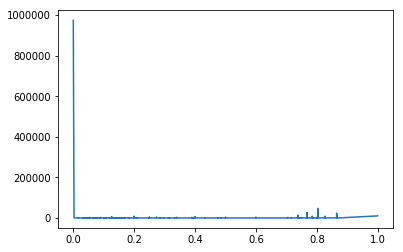

In [465]:
deal=train['deal_probability'].value_counts().sort_index()
plt.plot(deal)

**Here we can see a very strange distribution of the deal possibility where most of the products have 0 possiblility to be sold. We should build model to figure out what kind of products are in this category.**


### **2. Split the train dataset to 2 parts: train and validate**

In [478]:
from sklearn.model_selection import train_test_split

In [479]:
train_train, train_validate = train_test_split(train, test_size=0.3)

In [480]:
len(train)

1503424

In [481]:
print(len(train_train))
print(len(train_validate))

1052396
451028


### 3.Text Mining

**As for title and description variables, we should look into the text itself to see if the descriptions and word used for the advertisement affect our target variable.**

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #text feature extraction
from sklearn.decomposition import TruncatedSVD
import nltk
import string
from nltk.corpus import stopwords
from textblob import TextBlob

In [88]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huipi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
stopWords = stopwords.words('russian')

In [90]:
tfidf_des = TfidfVectorizer(max_features=50000, stop_words = stopWords)
tfidf_title = TfidfVectorizer(max_features=50000, stop_words = stopWords)
tfidf_param = TfidfVectorizer(max_features=6500, stop_words = stopWords, max_df=0.4)

### Train Dataset

train_train part

In [2]:
train_train['param'] = train_train[train_train.columns[6:9]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

In [91]:
train_train['description'] = train_train['description'].str.replace("[^[:alpha:]]", " ")
train_train['title'] = train_train['title'].str.replace("[^[:alpha:]]", " ")
train_train['param'] = train_train['param'].str.replace("[^[:alpha:]]", " ")

In [92]:
train_train['description'] = train_train['description'].str.replace("\\s+", " ")
train_train['title'] = train_train['title'].str.replace("\\s+", " ")
train_train['param'] = train_train['param'].str.replace("\\s+", " ")

In [93]:
train_train['description'] = train_train['description'].str.replace('[{}]'.format(string.punctuation), ' ')
train_train['title'] = train_train['title'].str.replace('[{}]'.format(string.punctuation), ' ')
train_train['param'] = train_train['param'].str.replace('[{}]'.format(string.punctuation), ' ')

In [94]:
des_tfidf = tfidf_des.fit_transform(train_train['description'].values.astype('U'))

In [95]:
title_tfidf = tfidf_title.fit_transform(train_train['title'].values.astype('U'))

In [96]:
param_tfidf = tfidf_param.fit_transform(train_train['param'].values.astype('U'))

In [97]:
n_comp=3
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
des_tfidf=svd_obj.fit(des_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [98]:
svd_title = TruncatedSVD(n_components=n_comp, algorithm='arpack')
title_tfidf=svd_title.fit(title_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [99]:
svd_param = TruncatedSVD(n_components=n_comp, algorithm='arpack')
param_tfidf=svd_param.fit(param_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [100]:
Avito_des_svd = pd.DataFrame(svd_obj.transform(des_tfidf))
Avito_des_svd.columns = ['svd_des_'+str(i+1) for i in range(n_comp)]
train_train[Avito_des_svd.columns] = Avito_des_svd

In [101]:
Avito_title_svd = pd.DataFrame(svd_title.transform(title_tfidf))
Avito_title_svd.columns = ['svd_title_'+str(i+1) for i in range(n_comp)]
train_train[Avito_title_svd.columns] = Avito_title_svd

In [102]:
Avito_param_svd = pd.DataFrame(svd_param.transform(param_tfidf))
Avito_param_svd.columns = ['svd_param_'+str(i+1) for i in range(n_comp)]
train_train[Avito_param_svd.columns] = Avito_param_svd

In [104]:
train_train['des_length'] = train_train['description'].apply(lambda x: len(str(x))) 
train_train['des_char_count'] = train_train['description'].str.len()
train_train['des_word_density'] = train_train['des_char_count'] / (train_train['describe_num']+1)

In [105]:
train_train['des_length'] = train_train['description'].apply(lambda x: len(str(x))) 
train_train['des_char_count'] = train_train['description'].str.len()
train_train['des_word_density'] = train_train['des_char_count'] / (train_train['describe_num']+1)

In [106]:
train_train['des_numerics'] = train_train['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [107]:
train_train['title_numerics'] = train_train['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

train_validate part

In [2]:
train_validate['param'] = train_validate[train_validate.columns[6:9]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

In [91]:
train_validate['description'] = train_validate['description'].str.replace("[^[:alpha:]]", " ")
train_validate['title'] = train_validate['title'].str.replace("[^[:alpha:]]", " ")
train_validate['param'] = train_validate['param'].str.replace("[^[:alpha:]]", " ")

In [92]:
train_validate['description'] = train_validate['description'].str.replace("\\s+", " ")
train_validate['title'] = train_validate['title'].str.replace("\\s+", " ")
train_validate['param'] = train_validate['param'].str.replace("\\s+", " ")

In [93]:
train_validate['description'] = train_validate['description'].str.replace('[{}]'.format(string.punctuation), ' ')
train_validate['title'] = train_validate['title'].str.replace('[{}]'.format(string.punctuation), ' ')
train_validate['param'] = train_validate['param'].str.replace('[{}]'.format(string.punctuation), ' ')

In [94]:
des_tfidf = tfidf_des.fit_transform(train_validate['description'].values.astype('U'))

In [95]:
title_tfidf = tfidf_title.fit_transform(train_validate['title'].values.astype('U'))

In [96]:
param_tfidf = tfidf_param.fit_transform(train_validate['param'].values.astype('U'))

In [97]:
n_comp=3
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
des_tfidf = svd_obj.fit(des_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [98]:
svd_title = TruncatedSVD(n_components=n_comp, algorithm='arpack')
title_tfidf = svd_title.fit(title_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [99]:
svd_param = TruncatedSVD(n_components=n_comp, algorithm='arpack')
param_tfidf = svd_param.fit(param_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [108]:
Avito_des_svd = pd.DataFrame(svd_obj.transform(des_tfidf))
Avito_des_svd.columns = ['svd_des_'+str(i+1) for i in range(n_comp)]
train_validate[Avito_des_svd.columns] = Avito_des_svd

In [109]:
Avito_title_svd = pd.DataFrame(svd_title.transform(title_tfidf))
Avito_title_svd.columns = ['svd_title_'+str(i+1) for i in range(n_comp)]
train_validate[Avito_title_svd.columns] = Avito_title_svd

In [111]:
Avito_param_svd = pd.DataFrame(svd_param.transform(param_tfidf))
Avito_param_svd.columns = ['svd_param_'+str(i+1) for i in range(n_comp)]
train_validate[Avito_param_svd.columns] = Avito_param_svd

In [112]:
train_vailidate['des_length'] = train_vailidate['description'].apply(lambda x: len(str(x))) 
train_vailidate['des_char_count'] = train_vailidate['description'].str.len()
train_vailidate['des_word_density'] = train_vailidate['des_char_count'] / (train_vailidate['describe_num']+1)

In [113]:
train_vailidate['title_length'] = train_vailidate['title'].apply(lambda x: len(str(x))) 
train_vailidate['title_char_count'] = train_vailidate['title'].str.len()
train_vailidate['title_word_density'] = train_vailidate['title_char_count'] / (train_train['title_num']+1)

In [114]:
train_vailidate['des_numerics'] = train_vailidate['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [115]:
train_vailidate['title_numerics'] = train_vailidate['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

### Test Dataset

In [1]:
test['param'] = test[test.columns[6:9]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

In [6]:
test['description'] = test['description'].str.replace("[^[:alpha:]]", " ")
test['title'] = test['title'].str.replace("[^[:alpha:]]", " ")
test['param'] = test['param'].str.replace("[^[:alpha:]]", " ")

In [7]:
test['description'] = test['description'].str.replace("\\s+", " ")
test['title'] = test['title'].str.replace("\\s+", " ")
test['param'] = test['param'].str.replace("\\s+", " ")

In [8]:
test['description'] = test['description'].str.replace('[{}]'.format(string.punctuation), ' ')
test['title'] = test['title'].str.replace('[{}]'.format(string.punctuation), ' ')
test['param'] = test['param'].str.replace('[{}]'.format(string.punctuation), ' ')

In [9]:
des_tfidf = tfidf_des.fit_transform(test['description'].values.astype('U'))

In [15]:
title_tfidf = tfidf_title.fit_transform(test['title'].values.astype('U'))

In [15]:
param_tfidf = tfidf_param.fit_transform(test['param'].values.astype('U'))

In [10]:
n_comp=3
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
des_tfidf=svd_obj.fit(des_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [17]:
svd_title = TruncatedSVD(n_components=n_comp, algorithm='arpack')
title_tfidf=svd_title.fit(title_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [17]:
svd_param = TruncatedSVD(n_components=n_comp, algorithm='arpack')
param_tfidf=svd_param.fit(param_tfidf)

TruncatedSVD(algorithm='arpack', n_components=3, n_iter=5, random_state=None,
       tol=0.0)

In [11]:
test_des_svd = pd.DataFrame(svd_obj.transform(des_tfidf.values.astype('U')))
test_des_svd.columns = ['svd_des_'+str(i+1) for i in range(n_comp)]
test[test_des_svd.columns] = test_des_svd

In [19]:
test_title_svd = pd.DataFrame(svd_title.transform(title_tfidf.values.astype('U')))
test_title_svd.columns = ['svd_title_'+str(i+1) for i in range(n_comp)]
test[test_title_svd.columns] = test_title_svd

In [19]:
test_param_svd = pd.DataFrame(svd_param.transform(param_tfidf.values.astype('U')))
test_param_svd.columns = ['svd_param_'+str(i+1) for i in range(n_comp)]
test[test_param_svd.columns] = test_param_svd

In [23]:
test['des_length'] = test['description'].apply(lambda x: len(str(x))) 
test['des_char_count'] = test['description'].str.len()
test['des_word_density'] = test['des_char_count'] / (test['describe_num']+1)

In [24]:
test['title_length'] = test['title'].apply(lambda x: len(str(x))) 
test['title_char_count'] = test['title'].str.len()
test['title_word_density'] = test['title_char_count'] / (test['title_num']+1)

In [25]:
test['des_numerics'] = test['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [26]:
test['title_numerics'] = test['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [17]:
train_train.columns

Index(['Unnamed: 0', 'region', 'city', 'parent_category_name', 'category_name',
       'param_1', 'param_2', 'param_3', 'title_x', 'description_x', 'price',
       'user_type', 'image_top_1', 'deal_probability', 'image_dummy',
       'price_dummy', 'day of week', 'month', 'title_num_x', 'describe_num_x',
       'seq_group', 'seq_group15', 'param_x', 'item_id', 'svd_des_1',
       'svd_des_2', 'svd_des_3', 'svd_title_1', 'svd_title_2', 'svd_title_3',
       'svd_param_1', 'svd_param_2', 'svd_param_3', 'des_length',
       'des_char_count', 'des_word_density', 'title_length',
       'title_char_count', 'title_word_density', 'des_numerics',
       'title_numerics'],
      dtype='object')

In [20]:
train_train = train_train[['item_id' , 'svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1',
       'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2',
       'svd_param_3', 'des_length', 'des_char_count', 'des_word_density',
       'title_length', 'title_char_count', 'title_word_density',
       'des_numerics', 'title_numerics']]

In [21]:
train_train.head()

,item_id,svd_des_1,svd_des_2,svd_des_3,svd_title_1,svd_title_2,svd_title_3,svd_param_1,svd_param_2,svd_param_3,des_length,des_char_count,des_word_density,title_length,title_char_count,title_word_density,des_numerics,title_numerics
0,ed21776bea63,0.062360,0.081297,-0.090549,0.000843,0.393297,-0.002175,5.769149e-01,-4.549707e-13,-1.671938e-01,118,118,6.210526,22,22,5.50,4,0
1,50d8e2656f92,0.010767,0.015732,-0.018050,0.000043,0.000005,0.000007,1.360651e-11,8.471577e-15,2.596416e-09,56,56,5.600000,9,9,2.25,6,1
2,b5892f7b472e,0.135901,0.002975,0.020902,0.000003,0.000253,0.000206,6.636525e-11,-2.072105e-14,3.651430e-09,240,240,7.741935,22,22,5.50,0,0
3,fc62498e40c1,0.012761,0.014335,-0.009879,0.626065,-0.001887,-0.002303,9.414092e-14,9.679651e-01,-1.469440e-12,84,84,6.461538,28,28,4.00,1,4
4,babd5b4ef81d,0.028162,0.021157,-0.006731,0.000003,0.000002,0.000003,4.292204e-06,1.641776e-09,1.224217e-05,143,143,5.958333,14,14,3.50,0,2


In [30]:
train_train.shape

(1052396, 35)

In [31]:
train_validate.shape

(451028, 35)

In [32]:
test.shape

(508438, 34)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
train_train[['svd_des_1', 'svd_des_2','svd_des_3']] = scaler.fit_transform(train_train[['svd_des_1', 'svd_des_2','svd_des_3']])
train_train[['svd_title_1', 'svd_title_2','svd_title_3']] = scaler.fit_transform(train_train[['svd_title_1', 'svd_title_2','svd_title_3']])
train_train[['svd_param_1', 'svd_param_2','svd_param_3']] = scaler.fit_transform(train_train[['svd_param_1', 'svd_param_2','svd_param_3']])
train_train[['title_word_density']] = scaler.fit_transform(train_train[['title_word_density']])

In [9]:
train_validate[['svd_des_1', 'svd_des_2','svd_des_3']] = scaler.fit_transform(train_validate[['svd_des_1', 'svd_des_2','svd_des_3']])
train_validate[['svd_title_1', 'svd_title_2','svd_title_3']] = scaler.fit_transform(train_validate[['svd_title_1', 'svd_title_2','svd_title_3']])
train_validate[['svd_param_1', 'svd_param_2','svd_param_3']] = scaler.fit_transform(train_validate[['svd_param_1', 'svd_param_2','svd_param_3']])
train_validate[['title_word_density']] = scaler.fit_transform(train_validate[['title_word_density']])

In [10]:
test[['svd_des_1', 'svd_des_2','svd_des_3']] = scaler.fit_transform(test[['svd_des_1', 'svd_des_2','svd_des_3']])
test[['svd_title_1', 'svd_title_2','svd_title_3']] = scaler.fit_transform(test[['svd_title_1', 'svd_title_2','svd_title_3']])
test[['svd_param_1', 'svd_param_2','svd_param_3']] = scaler.fit_transform(test[['svd_param_1', 'svd_param_2','svd_param_3']])
test[['title_word_density']] = scaler.fit_transform(test[['title_word_density']])

### **4. Combine the image features**

In [33]:
train_train = train_train.merge(trainfeatures, how='left', on='image')

In [34]:
train_train.head(50)

,item_id,svd_des_1,svd_des_2,svd_des_3,svd_title_1,svd_title_2,svd_title_3,svd_param_1,svd_param_2,svd_param_3,des_length,des_char_count,des_word_density,title_length,title_char_count,title_word_density,des_numerics,title_numerics,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue,blurrness
0,ed21776bea63,0.062360,0.081297,-0.090549,8.425599e-04,3.932966e-01,-2.174917e-03,5.769149e-01,-4.549707e-13,-1.671938e-01,118,118,6.210526,22,22,5.500000,4,0,9dd6f5296fe7,Ставропольский край,Ставрополь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,46–48 (L),Новое джинсовое платье,"Новое, очень качественное. Натуральная джинсовая ткань, платье на весну- осень. На ОГ-96, ОТ-88, ОБ- 100, длина 81 см.",1500.0,4,2017-03-15,Private,52507655931486f75c50270844b5bf1b696f8babf761bc45adf2d2154b357e92,523.0,0.00000,12450.0,"(360, 360)",360.0,360.0,237.000000,"[197.75097222222223, 189.65426697530864, 182.91037037037037]",0.775494,0.743742,0.717296,439.208862
1,50d8e2656f92,0.010767,0.015732,-0.018050,4.317144e-05,5.002887e-06,7.065227e-06,1.360651e-11,8.471577e-15,2.596416e-09,56,56,5.600000,9,9,2.250000,6,1,f22b9e17f9cd,Оренбургская область,Оренбург,Услуги,Предложение услуг,"Транспорт, перевозки",Коммерческие перевозки,NaN,До 4 тонн,5.20 2.10 2.10 тент все загрузки .город область межгород,NaN,42,2017-03-17,Private,NaN,NaN,0.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b5892f7b472e,0.135901,0.002975,0.020902,3.418436e-06,2.526652e-04,2.062870e-04,6.636525e-11,-2.072105e-14,3.651430e-09,240,240,7.741935,22,22,5.500000,0,0,1c24dfb11282,Челябинская область,Челябинск,Личные вещи,Товары для детей и игрушки,Товары для кормления,NaN,NaN,Стульчик для кормления,Продам стульчик для кормления в хорошем состоянии Хэппи Бэби.Ремни в комплекте.Съёмный столик и столешница.Очень удобно мыть его.Чехол на сидении тоже легко снимается и моется.Корзина для игрушек.Стул компактно складывается.Дефекты на фото.,1000.0,30,2017-03-22,Company,32977777039b93c24266ee0ccefeb5275453a4959db874260b474ff50763bcf3,811.0,0.80323,36761.0,"(360, 480)",360.0,480.0,152.666667,"[110.40394675925926, 130.1017476851852, 147.94518518518518]",0.432957,0.510203,0.580177,283.470256
3,fc62498e40c1,0.012761,0.014335,-0.009879,6.260651e-01,-1.887074e-03,-2.303144e-03,9.414092e-14,9.679651e-01,-1.469440e-12,84,84,6.461538,28,28,4.000000,1,4,b85d18f1782f,Иркутская область,Усть-Илимск,Недвижимость,Квартиры,Продам,2,Вторичка,"2-к квартира, 53 м², 5/9 эт.","Хорошая чистая квартира. Большой квадратный зал, 1 окно ПВХ. Большой угловой балкон.",1400000.0,228,2017-03-16,Company,c3503a40a4127fe72679a5bbec174362c533318d94607e60b72201427ab841e8,1431.0,0.24865,33129.0,"(288, 480)",288.0,480.0,168.000000,"[124.80219907407407, 127.68465711805555, 143.3480541087963]",0.489420,0.500724,0.562149,237.423595
4,babd5b4ef81d,0.028162,0.021157,-0.006731,2.917869e-06,1.518940e-06,3.264956e-06,4.292204e-06,1.641776e-09,1.224217e-05,143,143,5.958333,14,14,3.500000,0,2,d82be0c41173,Алтайский край,Тальменка,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2109,"ВАЗ 2109, 1994","машина в хтс,пороги,дно целое,меняные двери есть родные движок хадовка в норме для своих лет машына бомба, есть торг или обмен на задний привод",45000.0,5,2017-03-18,Private,b5012e3083e4fd14ad5b21ac026499e33fd35c13f3e6a3fc3d8075c8f414083b,1143.0,0.07231,19738.0,"(360, 480)",360.0,480.0,248.333333,"[130.11174768518518, 132.76030671296297, 127.97071759259259]",0.510242,0.520629,0.501846,256.218829
5,65afa0e0db52,0.024530,0.116345,0.057677,8.241469e-06,5.244548e-06,6.343549e-06,3.455617e-06,1.015882e-09,9.407988e-06,181,181,9.050000,20,20,5.000000,0,1,5ca4952241a2,Татарстан,Казань,Транспорт,Автомобили,С пробегом,Renault,Master,"Renault Master, 2013","Renault Master цельно-металлический фургон. Состояние хорошее. Будка утепле

In [35]:
train_validate = train_validate.merge(trainfeatures, how='left', on='image')

In [36]:
train_validate.head(50)

,item_id,svd_des_1,svd_des_2,svd_des_3,svd_title_1,svd_title_2,svd_title_3,svd_param_1,svd_param_2,svd_param_3,des_length,des_char_count,des_word_density,title_length,title_char_count,title_word_density,des_numerics,title_numerics,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue,blurrness
0,d596293b46b6,0.004470,0.006899,-0.012659,8.154727e-07,7.164216e-07,8.521811e-07,4.536239e-12,6.162334e-16,9.993838e-10,484,484,8.800000,33,33,6.600000,0,0,00393fb3054c,Нижегородская область,Городец,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Обратный (запорный) клапан. Dn110,"Новый.Для канализации Производитель - Мпласт. Диаметр 110мм./\nОбратный (запорный) клапан применяется в качестве запорной арматуры в состемах внутренней и наружной канализации. Клапан предназначен для блокировки противотока канализационных стоков, а также препятствует проникновению грызунов и насекомых в помещение в целях улучшения санитарно-технического состояния объекта. Запоный клапан перерывает канализационную систему автоматически в случае возникновения обратного противотока.",1100.0,94,2017-03-21,Company,54c8cd88f502cb5439e080e9f2c3122eb0bc54ee04c550e535430adb7f18f7c1,1386.0,0.00000,44439.0,"(360, 480)",360.0,480.0,10.000000,"[36.25080439814815, 82.33676504629629, 112.47649884259259]",0.142160,0.322889,0.441084,425.458414
1,d6544add8294,0.083395,0.103655,-0.170095,5.040959e-04,7.971044e-03,1.480508e-02,1.177067e-01,7.209969e-13,1.832735e-01,121,121,6.050000,21,21,4.200000,1,0,f85e482ed274,Ярославская область,Ярославль,Личные вещи,Детская одежда и обувь,Для девочек,Комбинезоны и боди,86-92 см (1-2 года),Новые боди на девочку,"Продам боди на девочку Mothercare, размер 86, светло розовый одет один раз, остальные два новые, очень красивые и удобные",700.0,110,2017-03-17,Company,9f2488b0f19cc92cf61d44307e51cc26497c33ddf42e0a41447f2559578a5e4a,83.0,0.00000,27427.0,"(356, 480)",356.0,480.0,129.000000,"[106.92498244382023, 113.99141502808989, 123.88433988764045]",0.419314,0.447025,0.485821,496.862963
2,f19ac2ba5862,0.003458,0.003890,-0.004658,4.525205e-04,1.919783e-05,6.429736e-05,1.523953e-06,6.861062e-15,7.760322e-05,43,43,6.142857,43,43,6.142857,1,1,9ddbe9f266dd,Красноярский край,Красноярск,Бытовая электроника,Аудио и видео,Наушники,NaN,NaN,Наушники капельки Music Level ML-200 yellow,Наушники капельки Music Level ML-200 yellow,250.0,378,2017-03-27,Company,0de6ad5d36eaa96366faccfade9ab95cde0d5b8f621c90865189023e0a0dd29b,3046.0,0.00000,18251.0,"(360, 360)",360.0,360.0,255.000000,"[174.7990663580247, 230.72570216049382, 235.61850308641976]",0.685487,0.904807,0.923994,189.239614
3,d766ea4b4f7b,0.005373,0.005976,-0.004775,2.038505e-04,7.125618e-04,6.525950e-03,1.320506e-01,1.786530e-12,1.325467e-01,34,34,4.857143,14,14,4.666667,0,0,e00310a7bfed,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,21,Сапожки зимние,"Полностью на меху, по подошве 16см",600.0,98,2017-03-21,Private,85a122f19c995fed826af9d59d39315addd1bbe0ba4388ffa34d17e7870b6240,91.0,0.00000,44279.0,"(360, 480)",360.0,480.0,117.000000,"[74.13134259259259, 72.89266203703704, 98.98261574074074]",0.290711,0.285854,0.388167,933.163987
4,725aa11aab94,0.126024,-0.018305,-0.049457,1.296638e-05,1.297999e-05,1.315660e-05,-3.016152e-16,-2.800971e-17,-1.171473e-15,138,138,6.571429,17,17,4.250000,8,0,0e2cdc172110,Самарская область,Тольятти,Бытовая электроника,Фототехника,Компактные фотоаппараты,NaN,NaN,Nikon Coolpix L23,"Фотоаппарат в отличном состоянии, цвет черный./\nматрица 10.34 МП (1/2.9""), оптический зум 5x, экран 2.7"",/\nформат аккумуляторов AA (2 шт.)",1800.0,603,2017-03-26,Company,0ae7ca229a44819677a6e84e56ac416e5a678db081ca6e2c9b0955b5306c785e,2999.0,0.00000,15415.0,"(360, 360)",360.0,360.0,255.000000,"[203.20304783950618, 202.89818672839507,

In [37]:
test = test.merge(testfeatures, how='left', on='image')

In [38]:
test.head(50)

,item_id,svd_des_1,svd_des_2,svd_des_3,svd_title_1,svd_title_2,svd_title_3,svd_param_1,svd_param_2,svd_param_3,des_length,des_char_count,des_word_density,title_length,title_char_count,title_word_density,des_numerics,title_numerics,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,size,pixel,width,height,brightness,average_color,average_red,average_green,average_blue,blurrness
0,6544e41a8817,0.000072,0.000044,-0.000087,1.567077e-05,3.181394e-04,4.547266e-05,1.443272e-01,2.186170e-13,7.647290e-02,12,12,4.000000,15,15,5.000000,0,0,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386bd5e32262735e68512,2020.0,41520.0,"(480, 360)",480.0,360.0,240.333333,"[104.18833912037037, 106.6178298611111, 106.25103587962963]",0.408582,0.418109,0.416671,313.459142
1,65b9484d670f,0.255379,0.050882,-0.067303,6.755264e-04,5.038244e-02,1.567457e-03,5.410481e-16,4.150657e-16,5.698557e-16,87,87,7.909091,16,16,5.333333,0,0,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состоянии.Все вопросы по телефону.торг уместен.",3000.0,4,2017-04-16,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8bab230b2ecd,0.039181,0.041959,-0.056344,5.136369e-06,1.089909e-05,2.786061e-05,6.487270e-12,-1.252750e-15,5.627242e-10,131,131,5.954545,3,3,1.500000,1,0,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт ТВ Wi-Fi приложения на базе андроида продаю в связи с покупкой более большего размера,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c9428bf86da6d04eb6b7d5,2960.0,61898.0,"(640, 360)",640.0,360.0,4.000000,"[86.98171006944445, 77.20920138888889, 70.7471484375]",0.341105,0.302781,0.277440,755.577396
3,8e348601fefc,0.038730,0.041644,-0.060176,1.383308e-02,8.148624e-05,7.249423e-03,3.220964e-12,3.596524e-15,2.332160e-10,93,93,7.153846,17,17,4.250000,0,1,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами.Модель Jetair Tina p60 inx, серебристого цвета.",4500.0,70,2017-04-17,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8bd2fe400b89,0.071747,0.066314,-0.073168,4.077499e-05,1.263335e-03,5.181187e-05,-8.385039e-15,1.077350e-15,1.144969e-14,60,60,5.454545,17,17,5.666667,1,0,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопросы по телефону.,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8fd15f8183be44dc701c,1002.0,49484.0,"(480, 360)",480.0,360.0,98.666667,"[59.624456018518515, 69.6418923611111, 92.10142939814814]",0.233821,0.273105,0.361182,344.751600
5,c63dbd6c657f,0.043473,0.067722,-0.126257,6.067726e-07,4.897771e-06,1.023191e-06,-2.811878e-16,-2.084165e-16,-2.958523e-16,222,222,7.655172,27,27,5.400000,12,0,c2a632af2602,Ростовская область,Ростов-на-Дону,Для дома и дачи,Ремонт и строительство,Окна и балконы,NaN,NaN,Стекла для пластиковых окон,Продаю стеклопакеты новые:/\n1. 1322х652х24 /\n2. 1178х427х24/\n3. 1175х745х24/\n4. 1097х648х24/\n5. 615х1420х24/\n6. 730х1118х24/\n7. 1193х743х24/\n8. 1138х628х24/\n9. 1183х708х24/\n10. 758х1158х24/\n11. 1198х633х24/\n12. 1188х748х24,500.0,39,2017-04-12,Private,7acdde494d48f4e46c8be158d64ad73a61d153b825c378abc5368428b365f155,1409.0,42256.0,"(640, 360)",640.0,360.0,198.666667,"[128.91246961805555, 136.11764756944444, 127.14078125]",0.505539,0.533795,0.498591,212.701510
6,6d1a410df86e,0.024557,0.067318,-0.011339,3.457190e-04,1.874446e-04,1.016578e-03,0.000000e+00,0.000000e+00,0.000000e+00,

### 5. Translate

**As for understanding better of the dataset, we translated some variables.**

In [42]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

In [43]:
train_train['region_en'] = train_train['region'].apply(lambda x : region_map[x])
train_train['parent_category_name_en'] = train_train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_train['category_name_en'] = train_train['category_name'].apply(lambda x : category_map[x])

In [44]:
train_validate['region_en'] = train_validate['region'].apply(lambda x : region_map[x])
train_validate['parent_category_name_en'] = train_validate['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_validate['category_name_en'] = train_validate['category_name'].apply(lambda x : category_map[x])

In [45]:
test['region_en'] = test['region'].apply(lambda x : region_map[x])
test['parent_category_name_en'] = test['parent_category_name'].apply(lambda x : parent_category_name_map[x])
test['category_name_en'] = test['category_name'].apply(lambda x : category_map[x])

In [46]:
train_train['parent_category_name_en'].value_counts()

Personal belongings        488250
For the home and garden    125045
Consumer electronics       121153
Real estate                107102
Hobbies & leisure          60304 
Transport                  56035 
Services                   45050 
Animals                    36807 
For business               12650 
Name: parent_category_name_en, dtype: int64

### **6. Add useful columns**

**The variables in the original dataset is more sparased and unfittable for model building.
Therefore, we did feature engineering to add and bin more useful dataset.**

### Train dataset

#### a.Add dummy variables that indicate that the item has the variable as "1", without as "0".

train_train part

In [47]:
train_train['image_dummy'] = np.where(train_train['image'].notnull(), 1, 0)

In [48]:
train_train['image_dummy'].value_counts()

1    973332
0    79064 
Name: image_dummy, dtype: int64

In [49]:
train_train['price_dummy'] = np.where(train_train['price'].notnull(), 1, 0)

In [50]:
train_train['price_dummy'].value_counts()

1    992756
0    59640 
Name: price_dummy, dtype: int64

train_validate part

In [51]:
train_validate['image_dummy'] = np.where(train_validate['image'].notnull(), 1, 0)

In [52]:
train_validate['image_dummy'].value_counts()

1    417504
0    33524 
Name: image_dummy, dtype: int64

In [53]:
train_validate['price_dummy'] = np.where(train_validate['price'].notnull(), 1, 0)

In [54]:
train_validate['price_dummy'].value_counts()

1    425306
0    25722 
Name: price_dummy, dtype: int64

#### b.Add time variables

train_train part

In [55]:
train_train['day of week']=pd.DatetimeIndex(train_train['activation_date']).weekday

In [56]:
train_train['month']=pd.DatetimeIndex(train_train['activation_date']).month

train_validate part

In [57]:
train_validate['day of week']=pd.DatetimeIndex(train_validate['activation_date']).weekday

In [58]:
train_validate['month']=pd.DatetimeIndex(train_validate['activation_date']).month

#### c.Add length of the title and discription

train_train part

In [59]:
train_train["title_num"] = train_train["title"].apply(lambda x: len(x.split()))

In [60]:
description1=train_train[train_train["description"].notnull()]

In [61]:
description1["describe_num"] = description1["description"].apply(lambda x: len(x.split()))

/Users/SJY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
description1=description1[['item_id','describe_num']]

In [63]:
train_train= train_train.merge(description1,on='item_id',how='left')

In [64]:
train_train["describe_num"].describe()

count    970850.000000
mean     27.246702    
std      41.245691    
min      1.000000     
25%      7.000000     
50%      14.000000    
75%      29.000000    
max      711.000000   
Name: describe_num, dtype: float64

train_validate part

In [65]:
train_validate["title_num"] = train_validate["title"].apply(lambda x: len(x.split()))

In [66]:
description2=train_validate[train_validate["description"].notnull()]

In [67]:
description2["describe_num"] = description2["description"].apply(lambda x: len(x.split()))

/Users/SJY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
description2=description2[['item_id','describe_num']]

In [69]:
train_validate= train_validate.merge(description2,on='item_id',how='left')

In [70]:
train_validate["describe_num"].describe()

count    416298.000000
mean     27.186126    
std      41.237076    
min      1.000000     
25%      7.000000     
50%      14.000000    
75%      28.000000    
max      661.000000   
Name: describe_num, dtype: float64

### Test Data set

#### a.Add dummy variables that indicate that the item has the variable as "1", without as "0".

In [71]:
test['image_dummy'] = np.where(test['image'].notnull(), 1, 0)

In [72]:
test['image_dummy'].value_counts()

1    465829
0    42609 
Name: image_dummy, dtype: int64

In [73]:
test['price_dummy'] = np.where(test['price'].notnull(), 1, 0)

In [74]:
test['price_dummy'].value_counts()

1    477853
0    30585 
Name: price_dummy, dtype: int64

#### b.Add time variables

In [75]:
test['day of week']=pd.DatetimeIndex(test['activation_date']).weekday

In [76]:
test['month']=pd.DatetimeIndex(test['activation_date']).month

#### c.Add length of the title and discription

In [77]:
test["title_num"] = test["title"].apply(lambda x: len(x.split()))

In [78]:
description4=test[test["description"].notnull()]

In [79]:
description4["describe_num"] = description4["description"].apply(lambda x: len(x.split()))

In [80]:
description4=description4[['item_id','describe_num']]

In [81]:
test= test.merge(description4,on='item_id',how='left')

In [82]:
test["describe_num"].describe()

count    508438.000000
mean     27.222145    
std      41.438067    
min      1.000000     
25%      7.000000     
50%      14.000000    
75%      29.000000    
max      716.000000   
Name: describe_num, dtype: float64

### **7.Impute missing Value**

### Train Dataset

train_train part

In [83]:
train_train.isnull().sum()

item_id                    0     
svd_des_1                  0     
svd_des_2                  0     
svd_des_3                  0     
svd_title_1                0     
svd_title_2                0     
svd_title_3                0     
svd_param_1                0     
svd_param_2                0     
svd_param_3                0     
des_length                 0     
des_char_count             0     
des_word_density           0     
title_length               0     
title_char_count           0     
title_word_density         0     
des_numerics               0     
title_numerics             0     
user_id                    0     
region                     0     
city                       0     
parent_category_name       0     
category_name              0     
param_1                    43253 
param_2                    458236
param_3                    603799
title                      0     
description                81546 
price                      59640 
item_seq_numbe

In [84]:
train_train['param_1'] = train_train['param_1'].fillna('unknown')
train_train['param_2'] = train_train['param_2'].fillna('unknown')
train_train['param_3'] = train_train['param_3'].fillna('unknown')

In [85]:
train_train['description'] = train_train['description'].fillna(' ')

In [86]:
priceset1=train_train[['parent_category_name_en','price']]

In [87]:
priceset1['price'] = priceset1.groupby('parent_category_name_en')['price'].transform(lambda x: x.fillna(x.mean()))

/Users/SJY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
train_train['price']= priceset1['price']

In [89]:
train_train['image'] = train_train['image'].fillna(0)
train_train['image_top_1'] = train_train['image_top_1'].fillna(0)

In [90]:
train_train['describe_num'] = train_train['describe_num'].fillna(0)

In [91]:
train_train['size'] = train_train['size'].fillna(0)
train_train['pixel'] = train_train['pixel'].fillna(0)
train_train['width'] = train_train['width'].fillna(0)
train_train['height'] = train_train['height'].fillna(0)
train_train['brightness'] = train_train['brightness'].fillna(0)
train_train['average_color'] = train_train['average_color'].fillna(0)
train_train['average_red'] = train_train['average_red'].fillna(0)
train_train['average_green'] = train_train['average_green'].fillna(0)
train_train['average_blue'] = train_train['average_blue'].fillna(0)
train_train['blurrness'] = train_train['blurrness'].fillna(0)

In [92]:
train_train.isnull().sum()

item_id                    0
svd_des_1                  0
svd_des_2                  0
svd_des_3                  0
svd_title_1                0
svd_title_2                0
svd_title_3                0
svd_param_1                0
svd_param_2                0
svd_param_3                0
des_length                 0
des_char_count             0
des_word_density           0
title_length               0
title_char_count           0
title_word_density         0
des_numerics               0
title_numerics             0
user_id                    0
region                     0
city                       0
parent_category_name       0
category_name              0
param_1                    0
param_2                    0
param_3                    0
title                      0
description                0
price                      0
item_seq_number            0
activation_date            0
user_type                  0
image                      0
image_top_1                0
deal_probabili

train_validate part

In [93]:
train_validate.isnull().sum()

item_id                    0     
svd_des_1                  0     
svd_des_2                  0     
svd_des_3                  0     
svd_title_1                0     
svd_title_2                0     
svd_title_3                0     
svd_param_1                0     
svd_param_2                0     
svd_param_3                0     
des_length                 0     
des_char_count             0     
des_word_density           0     
title_length               0     
title_char_count           0     
title_word_density         0     
des_numerics               0     
title_numerics             0     
user_id                    0     
region                     0     
city                       0     
parent_category_name       0     
category_name              0     
param_1                    18323 
param_2                    196306
param_3                    258766
title                      0     
description                34730 
price                      25722 
item_seq_numbe

In [94]:
train_validate['param_1'] = train_validate['param_1'].fillna('unknown')
train_validate['param_2'] = train_validate['param_2'].fillna('unknown')
train_validate['param_3'] = train_validate['param_3'].fillna('unknown')

In [95]:
train_validate['description'] = train_validate['description'].fillna(' ')

In [96]:
priceset2=train_validate[['parent_category_name_en','price']]

In [97]:
priceset2['price'] = priceset2.groupby('parent_category_name_en')['price'].transform(lambda x: x.fillna(x.mean()))

/Users/SJY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
train_validate['price']= priceset2['price']

In [99]:
train_validate['image'] = train_validate['image'].fillna(0)
train_validate['image_top_1'] = train_validate['image_top_1'].fillna(0)

In [100]:
train_validate['describe_num'] = train_validate['describe_num'].fillna(0)

In [101]:
train_validate['size'] = train_validate['size'].fillna(0)
train_validate['pixel'] = train_validate['pixel'].fillna(0)
train_validate['width'] = train_validate['width'].fillna(0)
train_validate['height'] = train_validate['height'].fillna(0)
train_validate['brightness'] = train_validate['brightness'].fillna(0)
train_validate['average_color'] = train_validate['average_color'].fillna(0)
train_validate['average_red'] = train_validate['average_red'].fillna(0)
train_validate['average_green'] = train_validate['average_green'].fillna(0)
train_validate['average_blue'] = train_validate['average_blue'].fillna(0)
train_validate['blurrness'] = train_validate['blurrness'].fillna(0)

In [102]:
train_validate.isnull().sum()

item_id                    0
svd_des_1                  0
svd_des_2                  0
svd_des_3                  0
svd_title_1                0
svd_title_2                0
svd_title_3                0
svd_param_1                0
svd_param_2                0
svd_param_3                0
des_length                 0
des_char_count             0
des_word_density           0
title_length               0
title_char_count           0
title_word_density         0
des_numerics               0
title_numerics             0
user_id                    0
region                     0
city                       0
parent_category_name       0
category_name              0
param_1                    0
param_2                    0
param_3                    0
title                      0
description                0
price                      0
item_seq_number            0
activation_date            0
user_type                  0
image                      0
image_top_1                0
deal_probabili

### Test Dataset

In [103]:
test.isnull().sum()

item_id                    0     
svd_des_1                  0     
svd_des_2                  0     
svd_des_3                  0     
svd_title_1                0     
svd_title_2                0     
svd_title_3                0     
svd_param_1                0     
svd_param_2                0     
svd_param_3                0     
des_length                 0     
des_char_count             0     
des_word_density           0     
title_length               0     
title_char_count           0     
title_word_density         0     
des_numerics               0     
title_numerics             0     
user_id                    0     
region                     0     
city                       0     
parent_category_name       0     
category_name              0     
param_1                    22910 
param_2                    233229
param_3                    306331
title                      0     
description                0     
price                      30585 
item_seq_numbe

In [104]:
test['param_1'] = test['param_1'].fillna('unknown')
test['param_2'] = test['param_2'].fillna('unknown')
test['param_3'] = test['param_3'].fillna('unknown')

In [105]:
priceset4=test[['parent_category_name_en','price']]

In [106]:
priceset4['price'] = priceset4.groupby('parent_category_name_en')['price'].transform(lambda x: x.fillna(x.mean()))

/Users/SJY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
test['price']= priceset4['price']

In [108]:
test['image'] = test['image'].fillna(0)
test['image_top_1'] = test['image_top_1'].fillna(0)

In [109]:
test['size'] = test['size'].fillna(0)
test['pixel'] = test['pixel'].fillna(0)
test['width'] = test['width'].fillna(0)
test['height'] = test['height'].fillna(0)
test['brightness'] = test['brightness'].fillna(0)
test['average_color'] = test['average_color'].fillna(0)
test['average_red'] = test['average_red'].fillna(0)
test['average_green'] = test['average_green'].fillna(0)
test['average_blue'] = test['average_blue'].fillna(0)
test['blurrness'] = test['blurrness'].fillna(0)

In [110]:
test.isnull().sum()

item_id                    0
svd_des_1                  0
svd_des_2                  0
svd_des_3                  0
svd_title_1                0
svd_title_2                0
svd_title_3                0
svd_param_1                0
svd_param_2                0
svd_param_3                0
des_length                 0
des_char_count             0
des_word_density           0
title_length               0
title_char_count           0
title_word_density         0
des_numerics               0
title_numerics             0
user_id                    0
region                     0
city                       0
parent_category_name       0
category_name              0
param_1                    0
param_2                    0
param_3                    0
title                      0
description                0
price                      0
item_seq_number            0
activation_date            0
user_type                  0
image                      0
image_top_1                0
size          

### **8. Other Data Perperation Steps** 

#### a.Change data type to categorical

#### Train dataset

train_train part

In [111]:
train_train.dtypes

item_id                    object 
svd_des_1                  float64
svd_des_2                  float64
svd_des_3                  float64
svd_title_1                float64
svd_title_2                float64
svd_title_3                float64
svd_param_1                float64
svd_param_2                float64
svd_param_3                float64
des_length                 int64  
des_char_count             int64  
des_word_density           float64
title_length               int64  
title_char_count           int64  
title_word_density         float64
des_numerics               int64  
title_numerics             int64  
user_id                    object 
region                     object 
city                       object 
parent_category_name       object 
category_name              object 
param_1                    object 
param_2                    object 
param_3                    object 
title                      object 
description                object 
price               

In [112]:
train_train['image_top_1']=train_train['image_top_1'].astype(str)
train_train['day of week']=train_train['day of week'].astype(str)
train_train['month']=train_train['month'].astype(str)
train_train['describe_num']=train_train['describe_num'].astype(int)

train_validate part

In [113]:
train_validate['image_top_1']=train_validate['image_top_1'].astype(str)
train_validate['day of week']=train_validate['day of week'].astype(str)
train_validate['month']=train_validate['month'].astype(str)
train_validate['describe_num']=train_validate['describe_num'].astype(int)

#### Test Dataset

In [114]:
test['image_top_1']=test['image_top_1'].astype(str)
test['day of week']=test['day of week'].astype(str)
test['month']=test['month'].astype(str)
test['describe_num']=test['describe_num'].astype(int)

#### **b. Binning item_seq_number**

#### Train dataset

train_train part

In [115]:
train_train['item_seq_number'].nunique()

22912

In [116]:
group_names1 = ['1','2-3','4-6','7-10','11-15','16-20','21-25','25-30','30-40','40-60','60-100','100-200','200-500','500-10000','Over 10000']
bins1 = [0,1,3,6,10,15,20,25,30,40,60,100,200,500,10000,1000000]
train_train['seq_group15'] = pd.cut(train_train['item_seq_number'], bins=bins1, labels=group_names1)

In [118]:
train_train['seq_group15'].value_counts()

60-100        103700
40-60         96373 
100-200       94555 
7-10          81788 
4-6           80096 
11-15         79930 
2-3           74719 
30-40         71011 
500-10000     67171 
16-20         63790 
1             63334 
200-500       62044 
21-25         52946 
25-30         45147 
Over 10000    15792 
Name: seq_group15, dtype: int64

train_validate part

In [119]:
train_validate['item_seq_number'].nunique()

13793

In [120]:
group_names2 = ['1','2-3','4-6','7-10','11-15','16-20','21-25','25-30','30-40','40-60','60-100','100-200','200-500','500-10000','Over 10000']
bins2 = [0,1,3,6,10,15,20,25,30,40,60,100,200,500,10000,1000000]
train_validate['seq_group15'] = pd.cut(train_validate['item_seq_number'], bins=bins2, labels=group_names2)

In [121]:
train_validate['seq_group15'].value_counts()

60-100        44090
40-60         41647
100-200       40149
7-10          35339
11-15         34484
4-6           34286
2-3           31809
30-40         30239
500-10000     28939
16-20         27536
1             27044
200-500       26924
21-25         22610
25-30         19073
Over 10000    6859 
Name: seq_group15, dtype: int64

#### Test dataset

In [122]:
test['item_seq_number'].nunique()

15890

In [123]:
group_names4 = ['1','2-3','4-6','7-10','11-15','16-20','21-25','25-30','30-40','40-60','60-100','100-200','200-500','500-10000','Over 10000']
bins4 = [0,1,3,6,10,15,20,25,30,40,60,100,200,500,10000,1000000]
test['seq_group15'] = pd.cut(test['item_seq_number'], bins=bins4, labels=group_names4)

In [124]:
test['seq_group15'].value_counts()

60-100        49880
40-60         45323
100-200       44919
7-10          39076
4-6           38315
11-15         37438
2-3           36678
500-10000     35853
30-40         33660
200-500       31660
1             31471
16-20         29793
21-25         24628
25-30         20641
Over 10000    9103 
Name: seq_group15, dtype: int64

#### c. Transform price

#### Train dataset

train_train part

In [125]:
train_train['price']=np.log1p(train_train['price'])

In [126]:
train_train['price'].head()

0    7.313887 
1    9.728127 
2    6.908755 
3    14.151984
4    10.714440
Name: price, dtype: float64

train_validate part

In [127]:
train_validate['price']=np.log1p(train_validate['price'])

In [128]:
train_validate['price'].head()

0    7.003974
1    6.552508
2    5.525453
3    6.398595
4    7.496097
Name: price, dtype: float64

#### Test Dataset

In [129]:
test['price']=np.log1p(test['price'])

In [130]:
test['price'].head()

0    8.513935
1    8.006701
2    9.615872
3    8.412055
4    8.497195
Name: price, dtype: float64

#### **c.Drop useless columns**

#### Trian Dataset

In [131]:
train_train.columns

Index(['item_id', 'svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1',
       'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2',
       'svd_param_3', 'des_length', 'des_char_count', 'des_word_density',
       'title_length', 'title_char_count', 'title_word_density',
       'des_numerics', 'title_numerics', 'user_id', 'region', 'city',
       'parent_category_name', 'category_name', 'param_1', 'param_2',
       'param_3', 'title', 'description', 'price', 'item_seq_number',
       'activation_date', 'user_type', 'image', 'image_top_1',
       'deal_probability', 'size', 'pixel', 'width', 'height', 'brightness',
       'average_color', 'average_red', 'average_green', 'average_blue',
       'blurrness', 'region_en', 'parent_category_name_en', 'category_name_en',
       'image_dummy', 'price_dummy', 'day of week', 'month', 'title_num',
       'describe_num', 'seq_group15'],
      dtype='object')

In [132]:
newtrain_train=train_train.drop(['user_id','item_seq_number','activation_date','image',
                                 'parent_category_name','category_name','region','city',
                                'param_1', 'param_2', 'param_3','average_color','pixel',
                                'title','description'], axis=1)

In [133]:
newtrain_train.columns

Index(['item_id', 'svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1',
       'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2',
       'svd_param_3', 'des_length', 'des_char_count', 'des_word_density',
       'title_length', 'title_char_count', 'title_word_density',
       'des_numerics', 'title_numerics', 'price', 'user_type', 'image_top_1',
       'deal_probability', 'size', 'width', 'height', 'brightness',
       'average_red', 'average_green', 'average_blue', 'blurrness',
       'region_en', 'parent_category_name_en', 'category_name_en',
       'image_dummy', 'price_dummy', 'day of week', 'month', 'title_num',
       'describe_num', 'seq_group15'],
      dtype='object')

In [134]:
newtrain_validate=train_validate.drop(['user_id','item_seq_number','activation_date','image',
                                 'parent_category_name','category_name','region','city',
                                'param_1', 'param_2', 'param_3','average_color','pixel','title','description'], axis=1)

In [135]:
newtrain_validate.columns

Index(['item_id', 'svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1',
       'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2',
       'svd_param_3', 'des_length', 'des_char_count', 'des_word_density',
       'title_length', 'title_char_count', 'title_word_density',
       'des_numerics', 'title_numerics', 'price', 'user_type', 'image_top_1',
       'deal_probability', 'size', 'width', 'height', 'brightness',
       'average_red', 'average_green', 'average_blue', 'blurrness',
       'region_en', 'parent_category_name_en', 'category_name_en',
       'image_dummy', 'price_dummy', 'day of week', 'month', 'title_num',
       'describe_num', 'seq_group15'],
      dtype='object')

#### Test Dataset

In [136]:
newtest=test.drop(['user_id','item_seq_number','activation_date','image',
                                 'parent_category_name','category_name','region','city',
                                'param_1', 'param_2', 'param_3','average_color','pixel','title','description'], axis=1)

In [137]:
newtest.columns

Index(['item_id', 'svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1',
       'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2',
       'svd_param_3', 'des_length', 'des_char_count', 'des_word_density',
       'title_length', 'title_char_count', 'title_word_density',
       'des_numerics', 'title_numerics', 'price', 'user_type', 'image_top_1',
       'size', 'width', 'height', 'brightness', 'average_red', 'average_green',
       'average_blue', 'blurrness', 'region_en', 'parent_category_name_en',
       'category_name_en', 'image_dummy', 'price_dummy', 'day of week',
       'month', 'title_num', 'describe_num', 'seq_group15'],
      dtype='object')

In [15]:
newtrain_train.columns

Index(['item_id', 'svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1',
       'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2',
       'svd_param_3', 'des_length', 'des_char_count', 'des_word_density',
       'title_length', 'title_char_count', 'title_word_density',
       'des_numerics', 'title_numerics', 'price', 'user_type', 'image_top_1',
       'deal_probability', 'size', 'width', 'height', 'brightness',
       'average_red', 'average_green', 'average_blue', 'blurrness',
       'region_en', 'parent_category_name_en', 'category_name_en',
       'image_dummy', 'price_dummy', 'day of week', 'month', 'title_num',
       'describe_num', 'seq_group15'],
      dtype='object')

## Model Building

**After all the data preparation steps, we began to build models.
Here we tried GLM, GBM, XGBoost, neural network as well as stacking model to train the data.
Please note that all our models in based with grid search method.**

### 1.GLM

In [26]:
import time         # for timers
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [27]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qn/bv633jns58n5zbcv6xp6l3200000gn/T/tmps6jxao_7
  JVM stdout: /var/folders/qn/bv633jns58n5zbcv6xp6l3200000gn/T/tmps6jxao_7/h2o_shaozhao_started_from_python.out
  JVM stderr: /var/folders/qn/bv633jns58n5zbcv6xp6l3200000gn/T/tmps6jxao_7/h2o_shaozhao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_shaozhao_x6ijx7
H2O cluster total nodes:,1
H2O cluster free memory:,14.22 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [28]:
train_df = h2o.H2OFrame(newtrain_train)
validate_df = h2o.H2OFrame(newtrain_validate)
test_df = h2o.H2OFrame(newtest)

/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
import re
import time

def gen_submission(preds, test=test_df):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param preds: Column vector of predictions.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test_df['item_id'].cbind(preds)
    sub.columns = ['item_id', 'deal_probability']
    
    # save file for submission
    sub_fname = '../Downloads/data3/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)

In [35]:
train_df['image_top_1']=train_df['image_top_1'].asfactor()
train_df['day of week']=train_df['day of week'].asfactor()
train_df['month']=train_df['month'].asfactor()

In [36]:
validate_df['image_top_1']=validate_df['image_top_1'].asfactor()
validate_df['day of week']=validate_df['day of week'].asfactor()
validate_df['month']=validate_df['month'].asfactor()

In [37]:
test_df['image_top_1']=test_df['image_top_1'].asfactor()
test_df['day of week']=test_df['day of week'].asfactor()
test_df['month']=test_df['month'].asfactor()

In [38]:
y = 'deal_probability'
X = [name for name in train_df.columns if name not in [y]]

In [39]:
X.remove('item_id')

In [40]:
print(y)
print(X)

deal_probability
['svd_des_1', 'svd_des_2', 'svd_des_3', 'svd_title_1', 'svd_title_2', 'svd_title_3', 'svd_param_1', 'svd_param_2', 'svd_param_3', 'des_length', 'des_char_count', 'des_word_density', 'title_length', 'title_char_count', 'title_word_density', 'des_numerics', 'title_numerics', 'price', 'user_type', 'image_top_1', 'size', 'width', 'height', 'brightness', 'average_red', 'average_green', 'average_blue', 'blurrness', 'region_en', 'parent_category_name_en', 'category_name_en', 'image_dummy', 'price_dummy', 'day of week', 'month', 'title_num', 'describe_num', 'seq_group15']


In [37]:
# elastic net regularized regression 
#   - Gaussian family, i.e. squared loss, for linear regression
#   - L1 for variable selection
#   - L2 for handling multicollinearity
#   - IRLS for handling outliers
#   - with lamba parameter tuning for variable selection

# initialize
glm_model = H2OGeneralizedLinearEstimator(family='gaussian',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True,
                                         nfolds=5,
                                         fold_assignment='Modulo',
                                         keep_cross_validation_predictions=True)

# train 
glm_model.train(X, y, training_frame=train_df, validation_frame=validate_df)

# print trained model info
glm_model

# view detailed results at http://host:ip/flow/index.html

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1530279005094_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05377974657726605
RMSE: 0.23190460663226603
MAE: 0.15789858646742716
RMSLE: 0.17300348291796272
R^2: 0.20450700337727123
Mean Residual Deviance: 0.05377974657726605
Null degrees of freedom: 1052395
Residual degrees of freedom: 1052158
Null deviance: 71147.81703820138
Residual deviance: 56597.59017892848
AIC: -88955.95278479448

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.05395952109298474
RMSE: 0.2322918877037783
MAE: 0.15824896985473505
RMSLE: 0.17332003560157763
R^2: 0.20323187607177773
Mean Residual Deviance: 0.05395952109298474
Null degrees of freedom: 451027
Residual degrees of freedom: 450790
Null deviance: 30544.975257034417
Residual deviance: 24337.25487952672
AIC: -36345.755512958

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1581442,0.0001633,0.1577060,0.1581326,0.1583067,0.1582287,0.1583467
mean_residual_deviance,0.0539425,0.0001231,0.0536916,0.0538367,0.0541810,0.0539194,0.0540839
mse,0.0539425,0.0001231,0.0536916,0.0538367,0.0541810,0.0539194,0.0540839
null_deviance,14229.614,44.740883,14157.317,14156.285,14294.602,14238.803,14301.067
r2,0.2020890,0.0010544,0.2017493,0.1995269,0.2022060,0.2029591,0.2040038
residual_deviance,11353.779,25.898746,11301.013,11331.497,11403.965,11348.906,11383.518
rmse,0.232255,0.0002650,0.2317145,0.2320274,0.2327682,0.2322056,0.2325594
rmsle,0.1732915,0.0001373,0.1729706,0.1732480,0.1735408,0.1732626,0.1734355


Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-06-29 09:52:28,0.000 sec,1,.7E-1,1,0.0676056,0.0677230,0.0676058,0.0001503
,2018-06-29 09:52:28,0.120 sec,2,.64E-1,2,0.0674097,0.0675299,0.0676056,0.0001504
,2018-06-29 09:52:28,0.228 sec,3,.58E-1,2,0.0672384,0.0673611,0.0676056,0.0001504
,2018-06-29 09:52:28,0.337 sec,4,.53E-1,3,0.0669406,0.0670638,0.0674849,0.0001532
,2018-06-29 09:52:28,0.447 sec,5,.48E-1,3,0.0664906,0.0666118,0.0673045,0.0001515
---,---,---,---,---,---,---,---,---,---
,2018-06-29 09:52:55,26.825 sec,96,.1E-4,1617,0.0538851,0.0540430,0.0540274,0.0000792
,2018-06-29 09:52:55,27.340 sec,97,.93E-5,1715,0.0538567,0.0540200,0.0540016,0.0000785
,2018-06-29 09:52:56,27.901 sec,98,.84E-5,1812,0.0538064,0.0539801,0.0539986,0.0000869
,2018-06-29 09:52:56,28.483 sec,99,.77E-5,1931,0.0537797,0.0539595,0.0539906,0.0000718



See the whole table with table.as_data_frame()


In [38]:
print(glm_model.rmse(train=True))

0.23190460663226603


In [39]:
print(glm_model.rmse(valid=True))

0.2322918877037783


In [40]:
# save the model
model_path = h2o.save_model(model=glm_model, path= "C:/Users/wchen/Desktop/models", force=True)

In [41]:
glm_model_test = glm_model.predict(test_df)
gen_submission(glm_model_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\wchen\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [200, 614]
  warnings.warn(w)
C:\Users\wchen\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'param_3_english' has levels not trained on: [110, 146, 2018-09-03 00:00:00, 2018-09-05 00:00:00, 2136, 2335, 240, 26th, 27th, 3000 GT, 3153, 353, 40-42 (XS), 402, 42-44 (S), 44-46 (M), 44-46 (S), 452 Loaf of bread, 46-48 (M), 48-50 (XL), 4Runner, 4x4 (Niva), 5 series GT, 50-52 (XL), 50-56 cm (0-2 months), 62-68 cm (2-6 months), 6th, 74-80 cm (7-12 months), 760, 7th, 8, <19, <35, <40, > 50 (XXL), AD, ATS, Accord, Ace, Aerio, Airwave, Altezza, Altima, Antara, Aristo, Atrai, Avante, Avenir, Axela, B5, Biante, Bora, Brevis, C-3d, CL, CLA class, Cami, Capa, Capella, Caprice, Carisma, Cayman, Cebrium (720), Celsior, Chariot, Clarus, Clio RS, Concorde, Cooper S Clubman, Cord

### 2. Random Forest

In [27]:
# RF with random hyperparameter search
# train many different RF models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2))}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':1800}

rsearch = H2OGridSearch(model=H2ORandomForestEstimator(nfolds=5,fold_assignment='Modulo',keep_cross_validation_predictions=True),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

rsearch.train(x=X,
              y=y,
              training_frame=train_df,
              validation_frame=validate_df,
              stopping_rounds=10)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [28]:
# show grid search results
rsearch.show()

# select best model
rf_model = rsearch.get_grid()[0]

# print model information
rf_model

    max_depth ntrees  \
0          18     29   
1          14     50   
2           6    400   

                                                     model_ids  \
0  Grid_DRF_py_3_sid_b726_model_python_1530125209496_2_model_2   
1  Grid_DRF_py_3_sid_b726_model_python_1530125209496_2_model_1   
2  Grid_DRF_py_3_sid_b726_model_python_1530125209496_2_model_0   

     residual_deviance  
0  0.05310543421600448  
1  0.05359115559053877  
2  0.05685588305177883  
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Grid_DRF_py_3_sid_b726_model_python_1530125209496_2_model_2


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.05404163456213455
RMSE: 0.23246856682600026
MAE: 0.15538091622536057
RMSLE: 0.17328785076059433
Mean Residual Deviance: 0.05404163456213455

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.05309196302262162
RMSE: 0.23041693302060423
MAE: 0.15485978841758552
RMSLE: 0.17140817022000818
Mean Residual Deviance

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1546975,0.0002502,0.1544023,0.1546322,0.1552384,0.1542714,0.1549432
mean_residual_deviance,0.0531054,0.0002011,0.0528807,0.0529376,0.0535686,0.0528368,0.0533035
mse,0.0531054,0.0002011,0.0528807,0.0529376,0.0535686,0.0528368,0.0533035
r2,0.2144752,0.0018624,0.2138050,0.2128958,0.2112235,0.2189631,0.2154887
residual_deviance,0.0531054,0.0002011,0.0528807,0.0529376,0.0535686,0.0528368,0.0533035
rmse,0.2304453,0.0004361,0.2299581,0.2300816,0.2314489,0.2298625,0.2308756
rmsle,0.1714705,0.0002867,0.1711325,0.1713225,0.1721202,0.1710351,0.1717424


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-27 15:19:10,29 min 2.827 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-06-27 15:19:14,29 min 6.747 sec,1.0,0.2626801,0.1643064,0.0690009,0.2628191,0.1644793,0.0690739
,2018-06-27 15:19:22,29 min 14.619 sec,3.0,0.2549266,0.1619548,0.0649876,0.2410410,0.1583582,0.0581008
,2018-06-27 15:19:30,29 min 22.507 sec,5.0,0.2491440,0.1604097,0.0620727,0.2364038,0.1568035,0.0558867
,2018-06-27 15:19:38,29 min 30.564 sec,7.0,0.2448695,0.1591355,0.0599611,0.2342028,0.1559801,0.0548509
,2018-06-27 15:19:53,29 min 45.291 sec,10.0,0.2405171,0.1577806,0.0578485,0.2325802,0.1553589,0.0540936
,2018-06-27 15:20:11,30 min 3.146 sec,14.0,0.2369943,0.1568590,0.0561663,0.2316672,0.1551980,0.0536697
,2018-06-27 15:20:32,30 min 24.420 sec,18.0,0.2348572,0.1560709,0.0551579,0.2309998,0.1548921,0.0533609
,2018-06-27 15:20:56,30 min 48.312 sec,23.0,0.2333714,0.1555523,0.0544622,0.2305409,0.1547239,0.0531491
,2018-06-27 15:21:29,31 min 21.462 sec,29.0,0.2324686,0.1553809,0.0540416,0.2304169,0.1548598,0.0530920


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
category_name_en,130569.2734375,1.0,0.2213443
image_top_1,105633.9609375,0.8090262,0.1790734
parent_category_name_en,61663.1757812,0.4722641,0.1045330
region_en,55631.25,0.4260669,0.0943075
seq_group15,40110.8242188,0.3071996,0.0679969
---,---,---,---
blurrness,7072.5976562,0.0541674,0.0119896
height,5961.4692383,0.0456575,0.0101060
price_dummy,1875.0386963,0.0143605,0.0031786
image_dummy,343.0612488,0.0026274,0.0005816



See the whole table with table.as_data_frame()


In [29]:
print(rf_model.rmse(train=True))

0.23246856682600026


In [30]:
print(rf_model.rmse(valid=True))

0.23041693302060423


In [31]:
rf_model_test = rf_model.predict(test_df)
gen_submission(rf_model_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\wchen\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [200, 614]
  warnings.warn(w)


### 3. ERT

In [32]:
# ERT with random hyperparameter search
# train many different RF models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2))}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':1800}

ertsearch = H2OGridSearch(model=H2ORandomForestEstimator(nfolds=5,fold_assignment='Modulo',keep_cross_validation_predictions=True,histogram_type='random'),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

ertsearch.train(x=X,
              y=y,
              training_frame=train_df,
              validation_frame=validate_df,
              stopping_rounds=10)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [33]:
#show grid search results
ertsearch.show()

# select best model
ert_model = ertsearch.get_grid()[0]

# print model information
ert_model

    max_depth ntrees  \
0           8    348   
1          18      0   

                                                     model_ids  \
0  Grid_DRF_py_3_sid_b726_model_python_1530125209496_3_model_1   
1  Grid_DRF_py_3_sid_b726_model_python_1530125209496_3_model_0   

     residual_deviance  
0  0.05807494860078983  
1  0.08695061512881257  
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Grid_DRF_py_3_sid_b726_model_python_1530125209496_3_model_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.05806658278131296
RMSE: 0.24097008690149274
MAE: 0.16800827967580556
RMSLE: 0.17862223426049073
Mean Residual Deviance: 0.05806658278131296

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.05818575758167663
RMSE: 0.2412172414685083
MAE: 0.16822178111965558
RMSLE: 0.17876275627233545
Mean Residual Deviance: 0.05818575758167663

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0580749486007898

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1680350,0.0002943,0.1679868,0.1678641,0.1688066,0.167551,0.1679666
mean_residual_deviance,0.0580749,0.0001799,0.0577981,0.0578047,0.0584377,0.0580543,0.0582799
mse,0.0580749,0.0001799,0.0577981,0.0578047,0.0584377,0.0580543,0.0582799
r2,0.1409674,0.0006880,0.1406965,0.1405283,0.1395276,0.1418377,0.1422470
residual_deviance,0.0580749,0.0001799,0.0577981,0.0578047,0.0584377,0.0580543,0.0582799
rmse,0.2409869,0.0003732,0.2404124,0.2404261,0.2417390,0.2409445,0.2414123
rmsle,0.1786230,0.0002233,0.1783304,0.1783228,0.1791487,0.1785076,0.1788053


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-27 15:49:29,27 min 49.388 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-06-27 15:49:30,27 min 50.124 sec,1.0,0.2441291,0.1662241,0.0595990,0.2442330,0.1663048,0.0596498
,2018-06-27 15:49:30,27 min 50.904 sec,2.0,0.2447885,0.1672185,0.0599214,0.2425704,0.1663778,0.0588404
,2018-06-27 15:49:31,27 min 51.807 sec,3.0,0.2455031,0.1678492,0.0602718,0.2433647,0.1670266,0.0592264
,2018-06-27 15:49:32,27 min 52.728 sec,4.0,0.2452623,0.1679053,0.0601536,0.2432325,0.1671286,0.0591620
,2018-06-27 15:49:37,27 min 57.162 sec,10.0,0.2426464,0.1671834,0.0588773,0.2416964,0.1669442,0.0584171
,2018-06-27 15:49:45,28 min 5.365 sec,21.0,0.2420182,0.1669846,0.0585728,0.2417308,0.1670246,0.0584338
,2018-06-27 15:50:02,28 min 22.783 sec,45.0,0.2412279,0.1673214,0.0581909,0.2412678,0.1674670,0.0582101
,2018-06-27 15:50:39,28 min 59.211 sec,93.0,0.2410172,0.1677970,0.0580893,0.2411539,0.1679733,0.0581552
,2018-06-27 15:51:53,30 min 13.823 sec,195.0,0.2410715,0.1679342,0.0581155,0.2412559,0.1681238,0.0582044


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
category_name_en,1869954.3750000,1.0,0.4333431
parent_category_name_en,1089132.6250000,0.5824381,0.2523955
image_top_1,687771.3750000,0.3678012,0.1593841
price,207510.2187500,0.1109707,0.0480884
user_type,128342.5156250,0.0686340,0.0297421
---,---,---,---
brightness,4543.5864258,0.0024298,0.0010529
blurrness,708.7791138,0.0003790,0.0001643
day of week,700.2178955,0.0003745,0.0001623
Unnamed: 0,478.8848572,0.0002561,0.0001110



See the whole table with table.as_data_frame()


In [34]:
print(ert_model.rmse(train=True))

0.24097008690149274


In [35]:
print(ert_model.rmse(valid=True))

0.2412172414685083


In [36]:
ert_model_test = ert_model.predict(test_df)
gen_submission(ert_model_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\wchen\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [200, 614]
  warnings.warn(w)


### 4.GBM

In [116]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':1800}

# initialize grid search
gsearch = H2OGridSearch(model=H2OGradientBoostingEstimator(nfolds=5,fold_assignment='Modulo',keep_cross_validation_predictions=True),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train_df,
              validation_frame=validate_df,
              stopping_rounds=10)

# view detailed results at http://localhost:54321/flow/index.html

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [117]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

    col_sample_rate max_depth ntrees sample_rate  \
0               0.8        10    150         0.3   
1               0.1         8    300         0.1   
2               0.7        12     50         0.1   
3               0.1         4     97         0.4   
4               0.7        16     73         0.2   

                                                      model_ids  \
0  Grid_GBM_py_35_sid_9c4e_model_python_1530288365896_1_model_2   
1  Grid_GBM_py_35_sid_9c4e_model_python_1530288365896_1_model_1   
2  Grid_GBM_py_35_sid_9c4e_model_python_1530288365896_1_model_0   
3  Grid_GBM_py_35_sid_9c4e_model_python_1530288365896_1_model_4   
4  Grid_GBM_py_35_sid_9c4e_model_python_1530288365896_1_model_3   

      residual_deviance  
0  0.052863268951093396  
1    0.0544884285884608  
2   0.05512482528234771  
3   0.05624821972169613  
4   0.05681176023241796  
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_35_sid_9c4e_model_python_1530288

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1536820,0.0002042,0.1531930,0.1535169,0.1539702,0.1538497,0.1538804
mean_residual_deviance,0.0528633,0.0001441,0.0525933,0.0526861,0.0531669,0.0529145,0.0529555
mse,0.0528633,0.0001441,0.0525933,0.0526861,0.0531669,0.0529145,0.0529555
r2,0.2180551,0.0009721,0.2180787,0.2166342,0.2171382,0.2178135,0.2206109
residual_deviance,0.0528633,0.0001441,0.0525933,0.0526861,0.0531669,0.0529145,0.0529555
rmse,0.2299197,0.0003133,0.2293322,0.2295346,0.2305795,0.2300316,0.2301206
rmsle,0.1716739,0.0001630,0.1713281,0.1715535,0.1720268,0.1717496,0.1717116


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-29 12:23:39,17 min 2.099 sec,0.0,0.2600107,0.1901577,0.0676056,0.2602365,0.1903435,0.0677230
,2018-06-29 12:23:39,17 min 2.790 sec,1.0,0.2553550,0.1859863,0.0652062,0.2557195,0.1862878,0.0653925
,2018-06-29 12:23:40,17 min 3.446 sec,2.0,0.2514562,0.1824426,0.0632302,0.2519886,0.1828659,0.0634983
,2018-06-29 12:23:41,17 min 4.141 sec,3.0,0.2483108,0.1795524,0.0616582,0.2489831,0.1800834,0.0619926
,2018-06-29 12:23:41,17 min 4.870 sec,4.0,0.2454126,0.1768468,0.0602274,0.2462770,0.1775097,0.0606523
,2018-06-29 12:23:42,17 min 5.618 sec,5.0,0.2429160,0.1744539,0.0590082,0.2439555,0.1752582,0.0595143
,2018-06-29 12:23:46,17 min 9.775 sec,12.0,0.2335494,0.1638584,0.0545453,0.2358391,0.1654818,0.0556201
,2018-06-29 12:23:51,17 min 14.054 sec,19.0,0.2294574,0.1582342,0.0526507,0.2330194,0.1606950,0.0542980
,2018-06-29 12:23:55,17 min 18.227 sec,26.0,0.2264028,0.1544813,0.0512582,0.2311929,0.1577111,0.0534502
,2018-06-29 12:23:59,17 min 22.476 sec,33.0,0.2243304,0.1521181,0.0503241,0.2303711,0.1561677,0.0530708


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
category_name_en,34495.9960938,1.0,0.3935661
image_top_1,15225.9306641,0.4413825,0.1737132
region_en,9365.2919922,0.2714892,0.1068490
seq_group15,6541.9521484,0.1896438,0.0746374
parent_category_name_en,4623.0590820,0.1340173,0.0527447
---,---,---,---
count,472.9980774,0.0137117,0.0053965
height,385.3219910,0.0111700,0.0043962
price_dummy,169.4272308,0.0049115,0.0019330
image_dummy,3.8380327,0.0001113,0.0000438



See the whole table with table.as_data_frame()


In [118]:
print(gbm_model.rmse(train=True))

0.2129287322009635


In [119]:
print(gbm_model.rmse(valid=True))

0.22932004750338947


In [120]:
gbm_model4=gbm_model

In [121]:
# save the model
model_path = h2o.save_model(model=gbm_model4, path= "C:/Users/wchen/Desktop/models", force=True)

In [123]:
gbm_model_test = gbm_model.predict(test_df)
gen_submission(gbm_model_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\wchen\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [200, 614]
  warnings.warn(w)


### 5. XGB

In [16]:
# XGBoost with random hyperparameter search
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':2400}

# initialize grid search
xbgsearch = H2OGridSearch(model=H2OXGBoostEstimator(nfolds=5,fold_assignment='Modulo',keep_cross_validation_predictions=True),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
xbgsearch.train(x=X,
              y=y,
              training_frame=train_df,
              validation_frame=validate_df,
              stopping_rounds=10)

# view detailed results at http://localhost:54321/flow/index.html

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [17]:
# show grid search results
xbgsearch.show()

# select best model
xgb_model = xbgsearch.get_grid()[0]

# print model information
xgb_model

    col_sample_rate max_depth ntrees sample_rate  \
0               1.0        14    250         0.6   
1               0.8         2    350         0.6   
2               0.4        12    250         1.0   
3               1.0        14    200         0.1   
4               0.1         4      0         0.5   

                                                         model_ids  \
0  Grid_XGBoost_py_3_sid_84ee_model_python_1530283019290_2_model_2   
1  Grid_XGBoost_py_3_sid_84ee_model_python_1530283019290_2_model_1   
2  Grid_XGBoost_py_3_sid_84ee_model_python_1530283019290_2_model_3   
3  Grid_XGBoost_py_3_sid_84ee_model_python_1530283019290_2_model_4   
4  Grid_XGBoost_py_3_sid_84ee_model_python_1530283019290_2_model_0   

     residual_deviance  
0   0.0534988745512499  
1  0.05376143197306154  
2  0.05387011113622759  
3   0.1255272651792036  
4  0.19786409953883102  
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  Grid_XGBoost_py_3_sid_84ee_model_python_1530283019290_2_mod

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1492335,0.0007695,0.1500132,0.1502072,0.1496970,0.1490453,0.1472050
mean_residual_deviance,0.0477165,0.0001611,0.0478796,0.0479880,0.0478214,0.0474819,0.0474114
mse,0.0477165,0.0001611,0.0478796,0.0479880,0.0478214,0.0474819,0.0474114
r2,0.2941933,0.0023828,0.2917794,0.2901764,0.2926412,0.2976634,0.298706
residual_deviance,0.0477165,0.0001611,0.0478796,0.0479880,0.0478214,0.0474819,0.0474114
rmse,0.2184404,0.0003688,0.2188142,0.2190617,0.2186810,0.2179033,0.2177415
rmsle,0.1631513,0.0003426,0.1634868,0.1637125,0.1633469,0.162841,0.1623693


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-29 11:13:47,34 min 38.460 sec,0.0,0.4448192,0.4296942,0.1978641,0.4448320,0.4296610,0.1978755
,2018-06-29 11:14:00,34 min 51.366 sec,1.0,0.3520468,0.3390474,0.1239369,0.3535184,0.3404095,0.1249753
,2018-06-29 11:14:10,35 min 1.294 sec,2.0,0.2947721,0.2764451,0.0868906,0.2981333,0.2791584,0.0888834
,2018-06-29 11:14:21,35 min 11.554 sec,3.0,0.2610184,0.2340449,0.0681306,0.2666429,0.2382080,0.0710985
,2018-06-29 11:14:31,35 min 21.923 sec,4.0,0.2420820,0.2058812,0.0586037,0.2496065,0.2111049,0.0623034
,2018-06-29 11:14:41,35 min 32.394 sec,5.0,0.2317546,0.1872525,0.0537102,0.2406434,0.1931854,0.0579093
,2018-06-29 11:14:52,35 min 42.987 sec,6.0,0.2259989,0.1747311,0.0510755,0.2359958,0.1812740,0.0556940
,2018-06-29 11:15:03,35 min 53.934 sec,7.0,0.2226781,0.1660719,0.0495855,0.2336350,0.1731323,0.0545853
,2018-06-29 11:15:14,36 min 4.908 sec,8.0,0.2201656,0.1595850,0.0484729,0.2322473,0.1673125,0.0539388
,2018-06-29 11:15:25,36 min 15.995 sec,9.0,0.2185722,0.1551357,0.0477738,0.2315646,0.1634132,0.0536221


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
price,2339.0,1.0,0.0625033
describe_num,1868.0,0.7986319,0.0499172
size,1739.0,0.7434801,0.0464700
brightness,1552.0,0.6635314,0.0414729
blurrness,1534.0,0.6558358,0.0409919
---,---,---,---
image_top_1.2910,1.0,0.0004275,0.0000267
param_3_english.Duet,1.0,0.0004275,0.0000267
image_top_1.2921,1.0,0.0004275,0.0000267
image_top_1.2924,1.0,0.0004275,0.0000267



See the whole table with table.as_data_frame()


In [18]:
print(xgb_model.rmse(train=True))

0.21632762590571453


In [19]:
print(xgb_model.rmse(valid=True))

0.230962757599123


In [20]:
xgb_model_test = xgb_model.predict(test_df)
gen_submission(xgb_model_test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [200, 614]
  warnings.warn(w)
/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'param_3_english' has levels not trained on: [110, 146, 2018-09-03 00:00:00, 2018-09-05 00:00:00, 2136, 2335, 240, 26th, 27th, 3000 GT, 3153, 353, 40-42 (XS), 402, 42-44 (S), 44-46 (M), 44-46 (S), 452 Loaf of bread, 46-48 (M), 48-50 (XL), 4Runner, 4x4 (Niva), 5 series GT, 50-52 (XL), 50-56 cm (0-2 months), 62-68 cm (2-6 months), 6th, 74-80 cm (7-12 months), 760, 7th, 8, <19, <35, <40, > 50 (XXL), AD, ATS, Accord, Ace, Aerio, Airwave, Altezza, Altima, Antara, Aristo, Atrai, Avante, Avenir, Axela, B5, Biante, Bora, Brevis, C-3d, CL, CLA class, Cami, Capa, Capella, Caprice, Carisma, Cayman, Cebrium (720), Celsior, Chariot, Clarus, Clio RS, Concorde, Cooper S Clubman, Corda, Corona, Corsa, Corsica, Coupe, Cresta, Creta, Cronos,

### 6. NN

In [89]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [125]:
## NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':1800}

# initialize grid search
nnsearch = H2OGridSearch(H2ODeepLearningEstimator(nfolds=5,fold_assignment='Modulo',keep_cross_validation_predictions=True),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
nnsearch.train(x=X,
              y=y,
              training_frame=train_df,
              validation_frame=validate_df)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [126]:
nnsearch.show()

# select best model
nn_model = nnsearch.get_grid()[0]

# print model information
nn_model

        hidden input_dropout_ratio   l1     l2  \
0    [80, 190]                0.18  0.0  0.008   

                                                               model_ids  \
0  Grid_DeepLearning_py_35_sid_9c4e_model_python_1530288365896_4_model_0   

      residual_deviance  
0  0.054739520316708624  
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  Grid_DeepLearning_py_35_sid_9c4e_model_python_1530288365896_4_model_0


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.053774502103700834
RMSE: 0.2318932989624772
MAE: 0.15354234695365512
RMSLE: 0.1719326838563551
Mean Residual Deviance: 0.053774502103700834

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.05447697573953865
RMSE: 0.23340303284134645
MAE: 0.15471240384460602
RMSLE: 0.17297033670264533
Mean Residual Deviance: 0.05447697573953865

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.054739520316708624
RMSE: 0.2339

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1508904,0.0040583,0.1527832,0.1499340,0.1607815,0.1468458,0.1441074
mean_residual_deviance,0.0549017,0.0003338,0.0544598,0.0545042,0.0547281,0.0550782,0.0557382
mse,0.0549017,0.0003338,0.0544598,0.0545042,0.0547281,0.0550782,0.0557382
r2,0.1879132,0.0034658,0.1903282,0.1896023,0.1941501,0.1858302,0.1796552
residual_deviance,0.0549017,0.0003338,0.0544598,0.0545042,0.0547281,0.0550782,0.0557382
rmse,0.2343090,0.0007111,0.2333663,0.2334613,0.2339404,0.2346874,0.2360894
rmsle,0.1739157,0.0005938,0.1738316,0.1724436,0.1747511,0.1738321,0.1747203


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2018-06-29 13:29:31,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-06-29 13:29:32,29 min 27.696 sec,4271 obs/sec,0.0034863,1,3669.0,0.2455370,0.0602884,0.1587248,0.0987433,0.2469175,0.0609683,0.1596570,0.0997405
,2018-06-29 13:34:30,34 min 27.882 sec,9533 obs/sec,2.2213340,637,2337723.0,0.2318933,0.0537745,0.1535423,0.1961204,0.2334030,0.0544770,0.1547124,0.1955911


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
category_name_en.Offer services,1.0,1.0,0.0013066
category_name_en.Cars,0.9398981,0.9398981,0.0012280
parent_category_name_en.Services,0.9011490,0.9011490,0.0011774
parent_category_name_en.Personal belongings,0.7965522,0.7965522,0.0010408
category_name_en.Apartments,0.7717899,0.7717899,0.0010084
---,---,---,---
seq_group15.missing(NA),0.0,0.0,0.0
parent_category_name_en.missing(NA),0.0,0.0,0.0
day of week.missing(NA),0.0,0.0,0.0
user_type.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [127]:
print(nn_model.rmse(train=True))
print(nn_model.rmse(valid=True))

0.2318932989624772
0.23340303284134645


In [128]:
# save the model
model_path = h2o.save_model(model=nn_model, path= "C:/Users/wchen/Desktop/models", force=True)

In [129]:
nn_model_test = nn_model.predict(test_df)
gen_submission(nn_model_test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


C:\Users\wchen\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [200, 614]
  warnings.warn(w)


### 7. Stacking Ensemble Model

In [395]:
ensemble = H2OStackedEnsembleEstimator(base_models=[glm_model,rf_model,ert_model,gbm_model,xgb_model])
ensemble.train(x=X, y=y, training_frame=train_df,validation_frame=validate_df)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [396]:
print(ensemble.rmse(train=True))

0.2200991388362709


In [397]:
print(ensemble.rmse(valid=True))

0.23019195772463896


In [398]:
ensemble_test = ensemble.predict(test_df)
gen_submission(ensemble_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'image_top_1' has levels not trained on: [144, 258, 614]
  warnings.warn(w)


**Comparing all the models' result, GBM model here did the best job. This result may related to our data preparation process.**